# Project 1 - Exploratory Data Analysis

## Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO)

## Dataset Description

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

In [1]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [3]:
df.shape

(3998, 39)

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
a=pd.Timestamp.today().date()
df['DOL']=df['DOL'].apply(lambda val:a if val=='present'else val)

In [6]:
df.head()

ID   Salary        DOJ        DOL               Designation    JobCity  \
0  203097   420000 2012-06-01 2022-08-22   senior quality engineer  Bangalore   
1  579905   500000 2013-09-01 2022-08-22         assistant manager     Indore   
2  810601   325000 2014-06-01 2022-08-22          systems engineer    Chennai   
3  267447  1100000 2011-07-01 2022-08-22  senior software engineer    Gurgaon   
4  343523   200000 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  ...  \
0      f 1990-02-19          84.3  board ofsecondary education,ap  ...   
1      m 1989-10-04          85.4                            cbse  ...   
2      f 1992-08-03          85.0                            cbse  ...   
3      m 1989-12-05          85.6                            cbse  ...   
4      m 1991-02-27          78.0                            cbse  ...   

   ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1             -1           -1         -1   
1               -1              -1             -1           -1         -1   
2               -1              -1             -1           -1         -1   
3               -1              -1             -1           -1         -1   
4               -1              -1             -1           -1         -1   

  conscientiousness agreeableness  extraversion  nueroticism  \
0            0.9737        0.8128        0.5269      1.35490   
1           -0.7335        0.3789        1.2396     -0.10760   
2            0.2718        1.7109        0.1637     -0.86820   
3            0.0464        0.3448       -0.3440     -0.40780   
4           -0.8810       -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 38 columns]

In [7]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
df.head()

ID   Salary        DOJ        DOL               Designation    JobCity  \
0  203097   420000 2012-06-01 2022-08-22   senior quality engineer  Bangalore   
1  579905   500000 2013-09-01 2022-08-22         assistant manager     Indore   
2  810601   325000 2014-06-01 2022-08-22          systems engineer    Chennai   
3  267447  1100000 2011-07-01 2022-08-22  senior software engineer    Gurgaon   
4  343523   200000 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  12percentage                             12board  CollegeID  \
0          2007          95.8  board of intermediate education,ap       1141   
1          2007          85.0                                cbse       5807   
2          2010          68.2                                cbse         64   
3          2007          83.6                                cbse       6920   
4          2008          76.8                                cbse      11368   

   CollegeTier       Degree                             Specialization  \
0            2  B.Tech/B.E.                       computer engineering   
1            2  B.Tech/B.E.  electronics and communication engineering   
2            2  B.Tech/B.E.                     information technology   
3            1  B.Tech/B.E.                       computer engineering   
4            2  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  Andhra Pradesh            2011   
1       70.06           5807                0  Madhya Pradesh            2012   
2       70.00             64                0   Uttar Pradesh            2014   
3       74.64           6920                1           Delhi            2011   
4       73.90          11368                0   Uttar Pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0      515      585    525  0.635979                  445   
1      695      610    780  0.960603                   -1   
2      615      545    370  0.450877                  395   
3      635      585    625  0.974396                  615   
4      545      625    465  0.124502                   -1   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                     -1               -1              -1              -1   
1                    466               -1              -1              -1   
2                     -1               -1              -1              -1   
3                     -1               -1              -1              -1   
4                    233               -1              -1              -1   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0           -1         -1             0.9737         0.8128        0.5269   
1           -1         -1            -0.7335         0.3789        1.2396   
2           -1         -1             0.2718         1.7109        0.1637   
3           -1         -1             0.0464         0.3448       -0.3440   
4           -1         -1            -0.8810        -0.2793       -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [9]:
#converting data type int to datetime

df[['12graduation']] = df[['12graduation']].apply(pd.to_datetime)
df[['12graduation']] = df[['12graduation']].values.astype('datetime64[s]')

In [10]:
df[['12graduation']].dtypes

12graduation    datetime64[ns]
dtype: object

### Statistical Analysis of the dataset

In [11]:
np.round(df.describe())

ID     Salary  10percentage  12percentage  CollegeID  \
count     3998.0     3998.0        3998.0        3998.0     3998.0   
mean    663795.0   307700.0          78.0          74.0     5157.0   
std     363218.0   212737.0          10.0          11.0     4802.0   
min      11244.0    35000.0          43.0          40.0        2.0   
25%     334284.0   180000.0          72.0          66.0      494.0   
50%     639600.0   300000.0          79.0          74.0     3879.0   
75%     990480.0   370000.0          86.0          83.0     8818.0   
max    1298275.0  4000000.0          98.0          99.0    18409.0   

       CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  \
count       3998.0      3998.0         3998.0           3998.0   
mean           2.0        71.0         5157.0              0.0   
std            0.0         8.0         4802.0              0.0   
min            1.0         6.0            2.0              0.0   
25%            2.0        66.0          494.0              0.0   
50%            2.0        72.0         3879.0              0.0   
75%            2.0        76.0         8818.0              1.0   
max            2.0       100.0        18409.0              1.0   

       GraduationYear  English  Logical   Quant  Domain  ComputerProgramming  \
count          3998.0   3998.0   3998.0  3998.0  3998.0               3998.0   
mean           2012.0    502.0    502.0   513.0     1.0                353.0   
std              32.0    105.0     87.0   122.0     0.0                205.0   
min               0.0    180.0    195.0   120.0    -1.0                 -1.0   
25%            2012.0    425.0    445.0   430.0     0.0                295.0   
50%            2013.0    500.0    505.0   515.0     1.0                415.0   
75%            2014.0    570.0    565.0   595.0     1.0                495.0   
max            2017.0    875.0    795.0   900.0     1.0                840.0   

       ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
count                 3998.0           3998.0          3998.0          3998.0   
mean                    95.0             91.0            23.0            16.0   
std                    158.0            175.0            98.0            88.0   
min                     -1.0             -1.0            -1.0            -1.0   
25%                     -1.0             -1.0            -1.0            -1.0   
50%                     -1.0             -1.0            -1.0            -1.0   
75%                    233.0             -1.0            -1.0            -1.0   
max                    612.0            715.0           623.0           676.0   

       TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
count       3998.0     3998.0             3998.0         3998.0        3998.0   
mean          32.0        3.0               -0.0            0.0           0.0   
std          105.0       37.0                1.0            1.0           1.0   
min           -1.0       -1.0               -4.0           -6.0          -5.0   
25%           -1.0       -1.0               -1.0           -0.0          -1.0   
50%           -1.0       -1.0                0.0            0.0           0.0   
75%           -1.0       -1.0                1.0            1.0           1.0   
max          548.0      516.0                2.0            2.0           3.0   

       nueroticism  openess_to_experience  
count       3998.0                 3998.0  
mean          -0.0                   -0.0  
std            1.0                    1.0  
min           -3.0                   -7.0  
25%           -1.0                   -1.0  
50%           -0.0                   -0.0  
75%            1.0                    1.0  
max            3.0                    2.0

In [12]:
df.describe(include='object')

Designation    JobCity Gender 10board 12board       Degree  \
count                3998       3998   3998    3998    3998         3998   
unique                419        339      2     275     340            4   
top     software engineer  Bangalore      m    cbse    cbse  B.Tech/B.E.   
freq                  539        627   3041    1395    1400         3700   

                                   Specialization   CollegeState  
count                                        3998           3998  
unique                                         46             26  
top     electronics and communication engineering  Uttar Pradesh  
freq                                          880            915

In [13]:
df=df.drop(['ID'],axis=1)

In [14]:
df['10board'].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [15]:
df['10board'] = df['10board'].replace(0,'cbse')

In [16]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric

In [17]:
tenth_brd = []
for i in df["10board"]:
    if i=="cbse"  or i=="cbse " or i=='cbse[gulf zone]' or i=="cgbse" or i=='central board of secondary education' or i=="cbese":
        tenth_brd.append("CBSE")
    elif i=="icse" or i=="icse board" or i=="ise" or i=="isc board" or i=="cicse":
        tenth_brd.append('ICSE')
    else:
        tenth_brd.append('STATE BOARD')

In [18]:
df['10board'] = tenth_brd

In [19]:
df['10board'].value_counts()

STATE BOARD    1954
CBSE           1761
ICSE            283
Name: 10board, dtype: int64

In [20]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [21]:
inter = []
for i in df["12board"]:
    if i=="cbse"  or i=="cbse,new delhi" or i=='cbse board' or i=='cbsc' or i=='cbese' or i=='central board of secondary education':
        inter.append("CBSE")
    elif i=="icse" or i=="isc board" or i=='aissce' or i=='all india board' or i=='isc board , new delhi' or i=='isce' or i=='cicse' or i=='ibe' or i=='isc':
        inter.append('ICSE')
    else:
        inter.append('STATE BOARD')

In [22]:
df['12board']=inter

In [23]:
df['12board'].value_counts()

STATE BOARD    2400
CBSE           1416
ICSE            182
Name: 12board, dtype: int64

In [24]:
df.head()

Salary        DOJ        DOL               Designation    JobCity Gender  \
0   420000 2012-06-01 2022-08-22   senior quality engineer  Bangalore      f   
1   500000 2013-09-01 2022-08-22         assistant manager     Indore      m   
2   325000 2014-06-01 2022-08-22          systems engineer    Chennai      f   
3  1100000 2011-07-01 2022-08-22  senior software engineer    Gurgaon      m   
4   200000 2014-03-01 2015-03-01                       get    Manesar      m   

         DOB  10percentage      10board 12graduation  12percentage  \
0 1990-02-19          84.3  STATE BOARD   1970-01-01          95.8   
1 1989-10-04          85.4         CBSE   1970-01-01          85.0   
2 1992-08-03          85.0         CBSE   1970-01-01          68.2   
3 1989-12-05          85.6         CBSE   1970-01-01          83.6   
4 1991-02-27          78.0         CBSE   1970-01-01          76.8   

       12board  CollegeID  CollegeTier       Degree  \
0  STATE BOARD       1141            2  B.Tech/B.E.   
1         CBSE       5807            2  B.Tech/B.E.   
2         CBSE         64            2  B.Tech/B.E.   
3         CBSE       6920            1  B.Tech/B.E.   
4         CBSE      11368            2  B.Tech/B.E.   

                              Specialization  collegeGPA  CollegeCityID  \
0                       computer engineering       78.00           1141   
1  electronics and communication engineering       70.06           5807   
2                     information technology       70.00             64   
3                       computer engineering       74.64           6920   
4  electronics and communication engineering       73.90          11368   

   CollegeCityTier    CollegeState  GraduationYear  English  Logical  Quant  \
0                0  Andhra Pradesh            2011      515      585    525   
1                0  Madhya Pradesh            2012      695      610    780   
2                0   Uttar Pradesh            2014      615      545    370   
3                1           Delhi            2011      635      585    625   
4                0   Uttar Pradesh            2012      545      625    465   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.635979                  445                     -1               -1   
1  0.960603                   -1                    466               -1   
2  0.450877                  395                     -1               -1   
3  0.974396                  615                     -1               -1   
4  0.124502                   -1                    233               -1   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0              -1              -1           -1         -1             0.9737   
1              -1              -1           -1         -1            -0.7335   
2              -1              -1           -1         -1             0.2718   
3              -1              -1           -1         -1             0.0464   
4              -1              -1           -1         -1            -0.8810   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0         0.8128        0.5269      1.35490                -0.4455  
1         0.3789        1.2396     -0.10760                 0.8637  
2         1.7109        0.1637     -0.86820                 0.6721  
3         0.3448       -0.3440     -0.40780                -0.9194  
4        -0.2793       -1.0697      0.09163                -0.1295

In [25]:
df.Degree.unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [26]:
df.isin([-1]).sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeablen

In [27]:
df.JobCity.value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [28]:
df.JobCity = df.JobCity.replace(-1,'Bangalore')

### Divide columns into Categorical, Numerical and Data time Features

In [29]:
catg_var=[]
num_var=[]
date_time_var=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        elif (df[col].dtypes =='datetime64[ns]'):
            date_time_var.append(col)
        else:
            num_var.append(col)

In [30]:
print(catg_var)

['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


In [31]:
print(date_time_var)

['DOJ', 'DOL', 'DOB', '12graduation']


In [32]:
print(num_var)

['Salary', '10percentage', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [33]:
for i in num_var:
    print(df[i].value_counts())
    print("####################################################################")

300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: Salary, Length: 177, dtype: int64
####################################################################
78.00    76
82.00    71
85.00    67
76.00    66
80.00    65
         ..
82.56     1
87.04     1
81.14     1
61.75     1
78.72     1
Name: 10percentage, Length: 851, dtype: int64
####################################################################
70.00    72
72.00    68
74.00    63
62.00    58
68.00    58
         ..
58.50     1
74.45     1
95.41     1
83.58     1
82.55     1
Name: 12percentage, Length: 801, dtype: int64
####################################################################
272      94
64       38
11759    35
44       35
47       33
         ..
128       1
5068      1
8637      1
9361      1
4883      1
Name: CollegeID, Length: 1350, dtype: int64
########################################################

## Univariate Analysis

### Probability and Frequency Distribution of each Numerical Column using Dist Plot

In [34]:
def pdf_col(num_var):
    plt.figure(figsize=(15,6))
    plt.axvline(df[num_var].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    
    ax = sns.distplot(df[num_var],
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 50,'alpha':1,'color':'#da70d6'})
    ax.set(xlabel=' {}'.format(num_var), ylabel='Frequency',title="PDF of {}".format(num_var))
    
    skew = df[col].skew()
    kurt = df[col].kurt()
    print('Skewness:{}'.format(round(skew,3)))
    print('Kurtosis:{}'.format(round(kurt,3)))
    
    plt.show()


### PDF distribution of Salary Column

Skewness:-1.507
Kurtosis:5.788


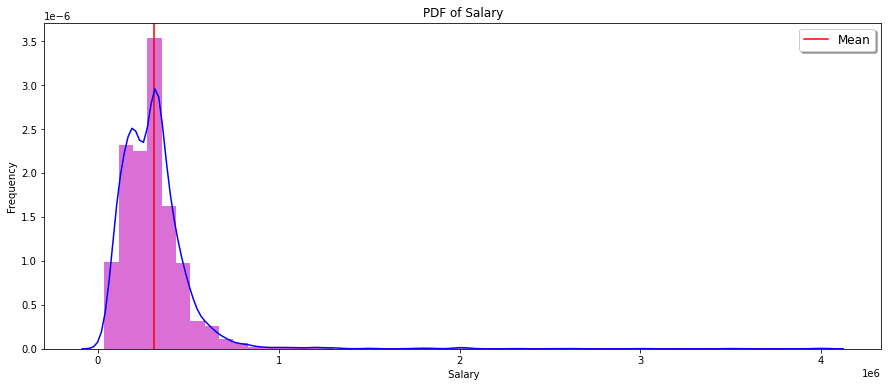

In [35]:
pdf_col('Salary')

#### Observation:from the above detailed graph we can observe that there is a long tail at the right side hence we'll consider Log Normal Distribution

### PDF distribution of  10percentage Column

Skewness:-1.507
Kurtosis:5.788


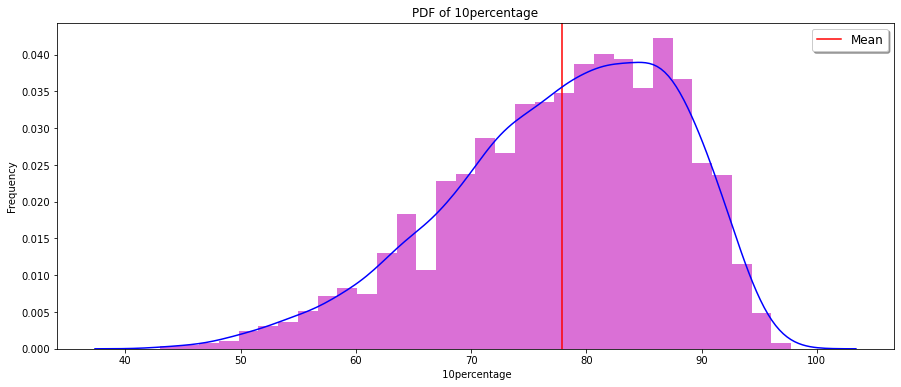

In [36]:
pdf_col('10percentage')

#### Observation:from the above detailed graph we can observe that there is a thick tail towards the left side hence we'll consider Negatively skewed distribution

### PDF distribution of 12percentage Column

Skewness:-1.507
Kurtosis:5.788


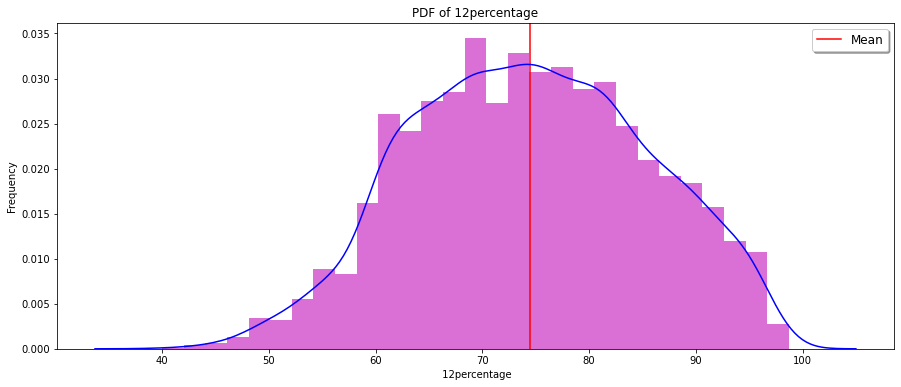

In [37]:
pdf_col('12percentage')

#### Observation:from the above detailed graph we can observe that there is a thick tail towards the left side hence we'll consider Negatively skewed distribution

### PDF distribution of collegeGPA Column

Skewness:-1.507
Kurtosis:5.788


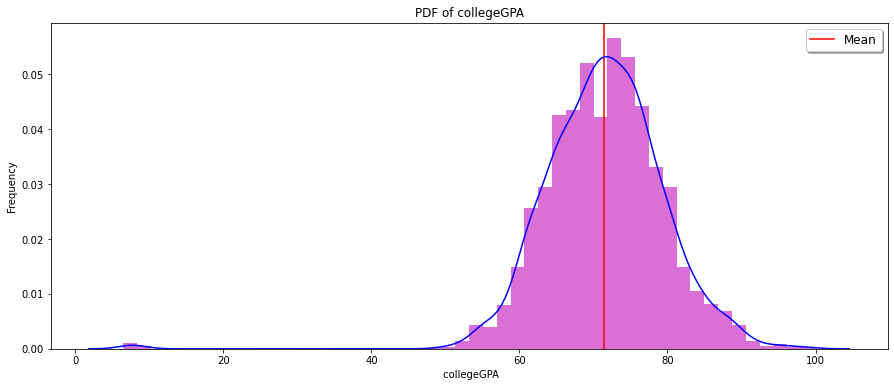

In [38]:
pdf_col('collegeGPA')

#### Observation:from the above detailed graph we can observe that there is a thick tail towards the left side hence we'll consider negatively skewed distribution

### PDF distribution of Domain Column

Skewness:-1.507
Kurtosis:5.788


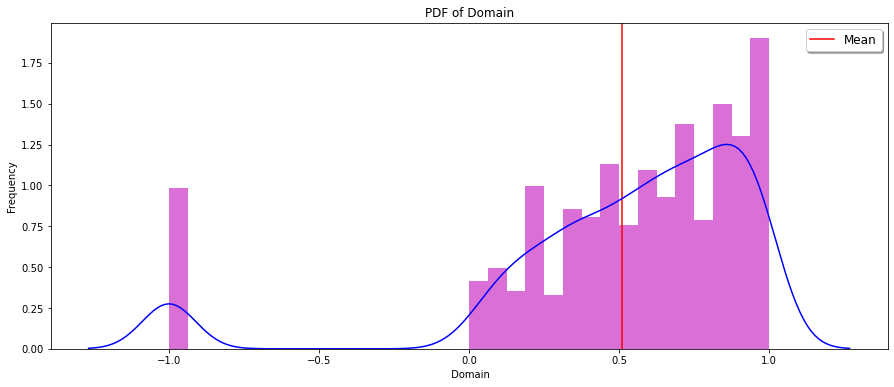

In [39]:
pdf_col('Domain')

#### Observation:from the above detailed graph we can observe that there is a plot having two major peaks we can't say about distribution

### PDF distribution of ComputerProgramming Column

Skewness:-1.507
Kurtosis:5.788


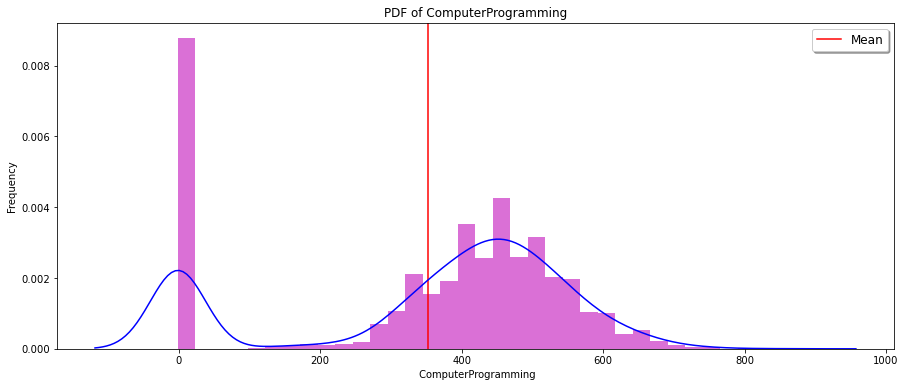

In [40]:
pdf_col('ComputerProgramming')

#### Observation:from the above detailed graph we can observe that there is a plot having two peaks.

### PDF distribution of ComputerScience Column

Skewness:-1.507
Kurtosis:5.788


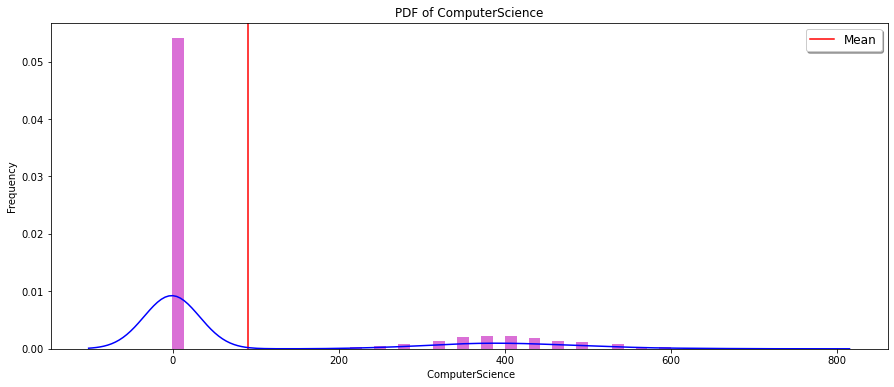

In [41]:
pdf_col('ComputerScience')

#### Observation:from the above detailed graph we can observe that there is a plot having 1 peak but not centrally concentrated.

### PDF distribution of Openess to Experience Column

Skewness:-1.507
Kurtosis:5.788


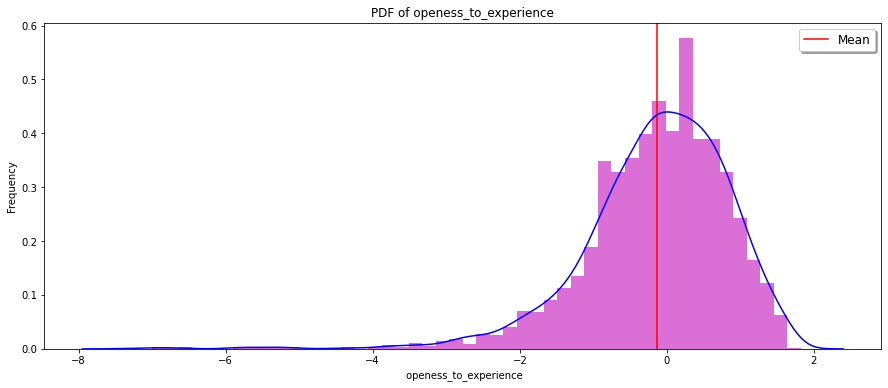

In [42]:
pdf_col('openess_to_experience')

In [43]:
for i in catg_var:
    print(df[i].value_counts())
    print("####################################################################")

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64
####################################################################
Bangalore           1088
Noida                368
Hyderabad            335
Pune                 290
Chennai              272
                    ... 
Asansol                1
Tirunelvelli           1
Ernakulam              1
Nanded                 1
Asifabadbanglore       1
Name: JobCity, Length: 338, dtype: int64
####################################################################
m    3041
f     957
Name: Gender, dtype: int64
###

### Frequency Distribution of each Categorical Variable by using Count Plot.

In [44]:
def catg(catg_var):
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = 90)
    ax=sns.countplot(df[catg_var].dropna(), order=df[catg_var].value_counts().iloc[:15].index)
    for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

### GENDER Wise Distribution

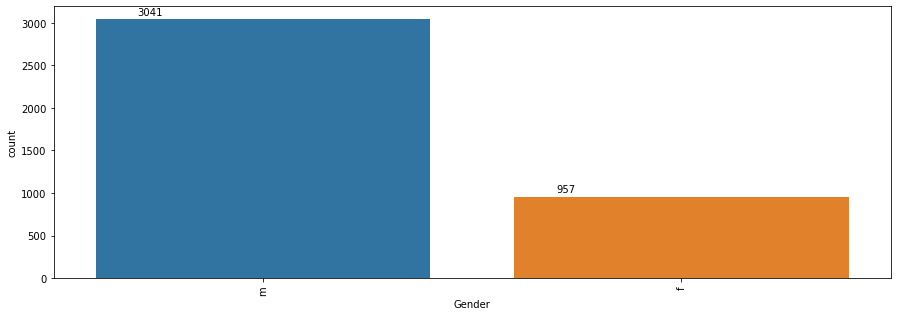

In [45]:
catg('Gender')

#### Observation:From the above plot we can observe that the n.o of male candidates are more compared to the female candidates

### Distribution of Job City Column

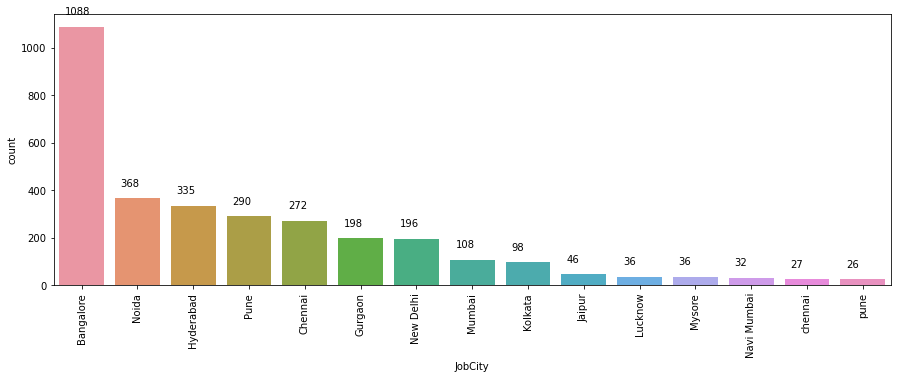

In [46]:
catg('JobCity')

#### Observation:From the above plot we observe that most of the candidates opt Bangalore As their preferred city

### Distribution of Degree Column

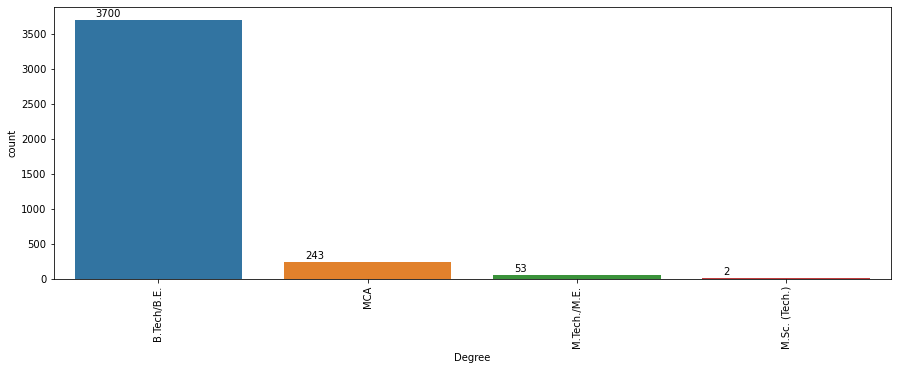

In [47]:
catg('Degree')

#### Observation:From the above plot we observe that most of the candidates are from B.Tech/B.E

### Distribution of Specialization Column

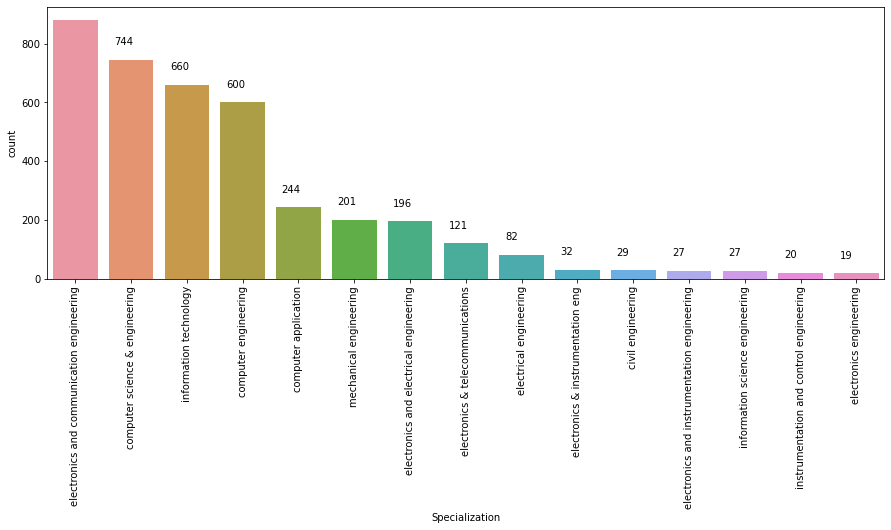

In [48]:
catg('Specialization')

#### Observation:From the above plot we observe that the specialization choosed by most of the candiates is Electronics and communication engineering

### Distribution of Designation Column

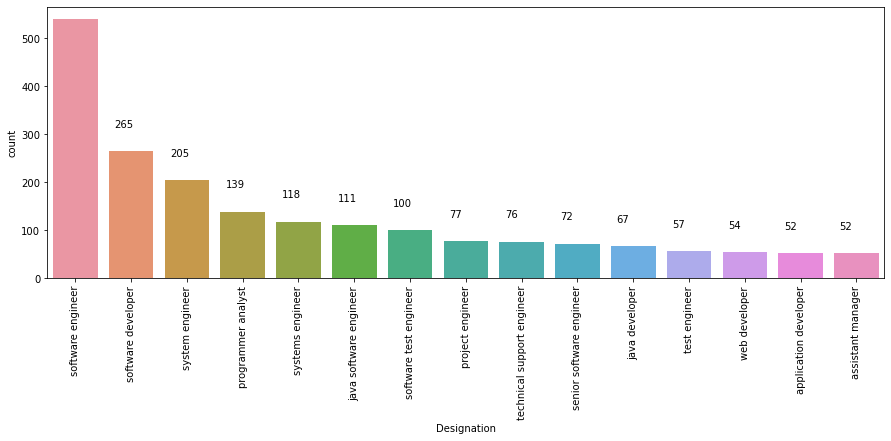

In [49]:
catg('Designation')

#### Observation:From the above plot we observe that most of the candidate choose software engineering as their designation

### Distribution of CollegeState Column

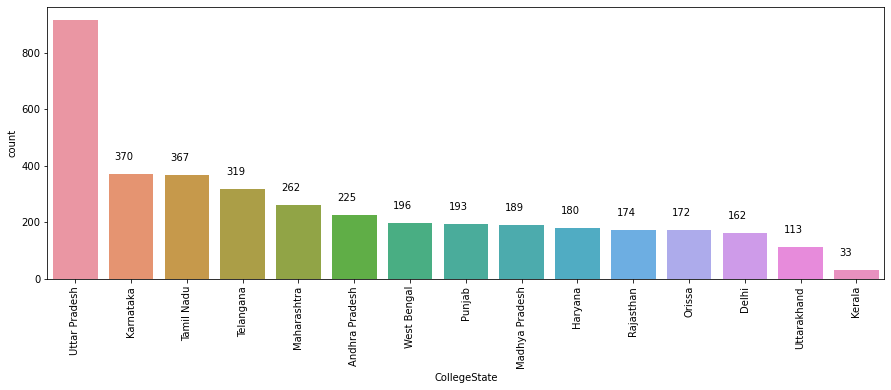

In [50]:
catg('CollegeState')

#### Observation:From the above plot we observe that most of the candidate choose colleges from Uttar Pradesh

### Distribution of 10th-board Column

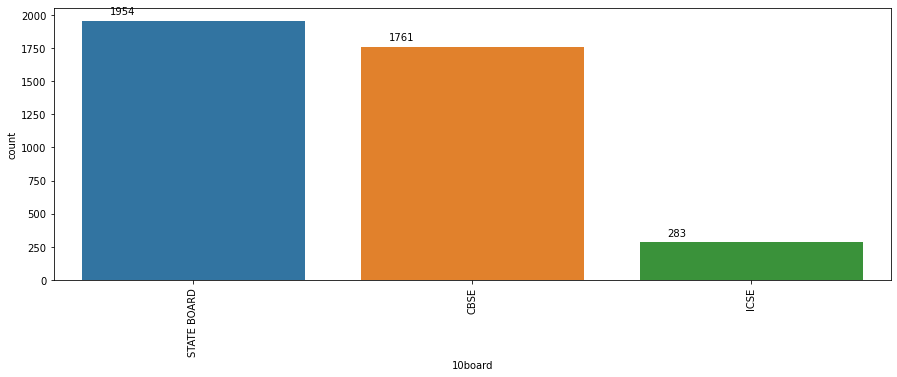

In [51]:
catg('10board')

#### Observation:From the above plot we observe that most of the candidates in 10th class choose State Board

### Distribution of 12th-board Column

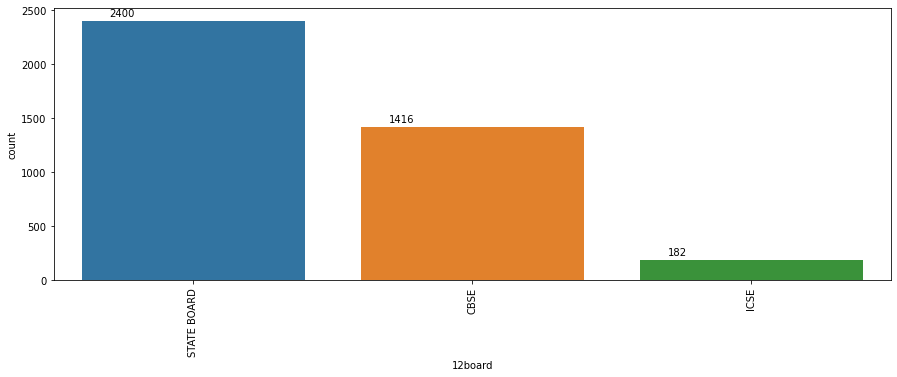

In [52]:
catg('12board')

#### Observation:From the above plot we observe that most of the candidates in 12th class choose State Board

### Finding the Outliers in each Numerical Column

In [53]:
def outl(num_var):
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df[num_var])
    

In [54]:
######Finding outliers using IQR method#####
def outliers_iqr(df,num_var):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[num_var]:
        if val < lb or val > ub:
            outliers.append(val)

    return outliers,len(outliers)

### Outliers in Salary

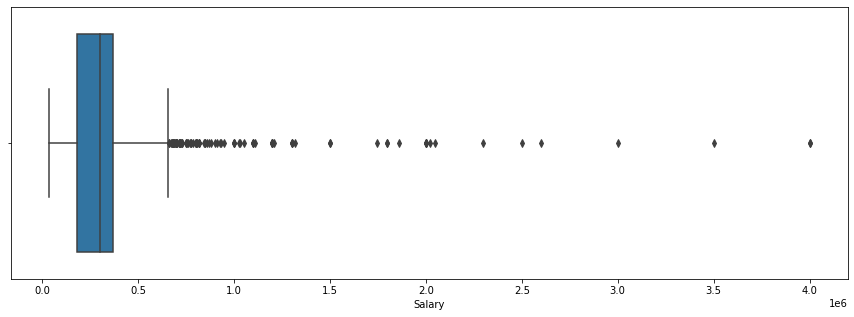

In [55]:
outl('Salary')

#### Observation:From the above plot we can say that there are some outliers

In [56]:
outliers_iqr(df,'Salary')

([420000,
  500000,
  325000,
  1100000,
  200000,
  300000,
  300000,
  400000,
  600000,
  230000,
  600000,
  450000,
  270000,
  200000,
  300000,
  350000,
  325000,
  250000,
  120000,
  325000,
  320000,
  200000,
  190000,
  180000,
  335000,
  435000,
  345000,
  300000,
  145000,
  220000,
  530000,
  340000,
  360000,
  145000,
  215000,
  350000,
  270000,
  80000,
  330000,
  200000,
  120000,
  145000,
  350000,
  120000,
  380000,
  110000,
  205000,
  95000,
  390000,
  270000,
  60000,
  120000,
  400000,
  350000,
  120000,
  250000,
  240000,
  525000,
  200000,
  120000,
  305000,
  300000,
  145000,
  150000,
  600000,
  310000,
  455000,
  400000,
  150000,
  250000,
  320000,
  250000,
  200000,
  240000,
  120000,
  300000,
  800000,
  120000,
  325000,
  100000,
  300000,
  280000,
  215000,
  145000,
  445000,
  315000,
  100000,
  200000,
  220000,
  370000,
  145000,
  275000,
  1500000,
  325000,
  275000,
  425000,
  450000,
  300000,
  470000,
  120000,
 

### Outliers in 10percentage

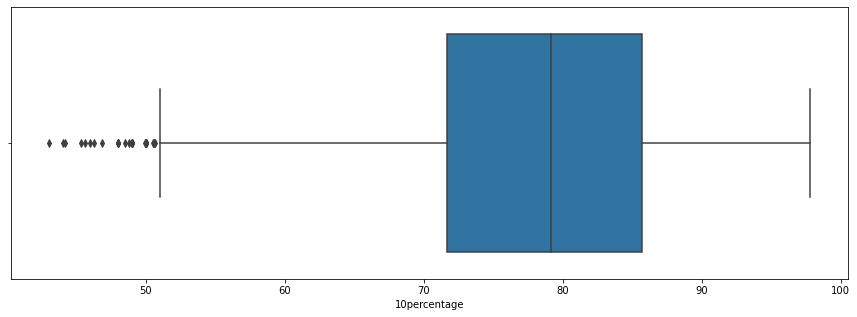

In [57]:
outl('10percentage')

#### Observation:From the above plot we can say that there are some outliers

In [58]:
outliers_iqr(df,'10percentage')

([84.3,
  85.4,
  85.0,
  85.6,
  78.0,
  89.92,
  86.08,
  92.0,
  90.0,
  77.0,
  88.6,
  81.0,
  83.6,
  60.8,
  81.2,
  69.54,
  85.8,
  60.8,
  65.0,
  79.0,
  91.2,
  75.67,
  92.5,
  70.0,
  88.0,
  86.8,
  90.88,
  76.8,
  84.0,
  64.0,
  84.0,
  77.2,
  87.0,
  73.0,
  71.0,
  85.0,
  91.5,
  77.0,
  52.33,
  88.0,
  66.6,
  75.0,
  91.4,
  59.0,
  84.5,
  95.8,
  85.6,
  69.6,
  86.6,
  81.92,
  66.5,
  80.0,
  85.2,
  89.25,
  58.4,
  90.8,
  78.0,
  89.88,
  63.3,
  72.0,
  83.0,
  85.3,
  81.0,
  60.66,
  78.0,
  89.37,
  90.0,
  81.0,
  78.0,
  84.4,
  89.0,
  86.0,
  85.0,
  75.0,
  86.0,
  70.6,
  93.44,
  76.0,
  86.4,
  86.0,
  84.83,
  72.3,
  69.0,
  80.0,
  73.33,
  86.16,
  75.0,
  56.0,
  87.0,
  79.25,
  88.66,
  80.8,
  79.0,
  70.0,
  81.16,
  83.5,
  65.0,
  88.0,
  79.0,
  55.6,
  75.0,
  84.6,
  79.0,
  62.0,
  62.0,
  86.0,
  85.8,
  68.4,
  51.0,
  79.6,
  63.4,
  86.53,
  76.18,
  91.43,
  78.0,
  76.17,
  82.4,
  58.0,
  79.0,
  90.04,
  76.0,
  60.4,
 

### Outliers in 12percentage

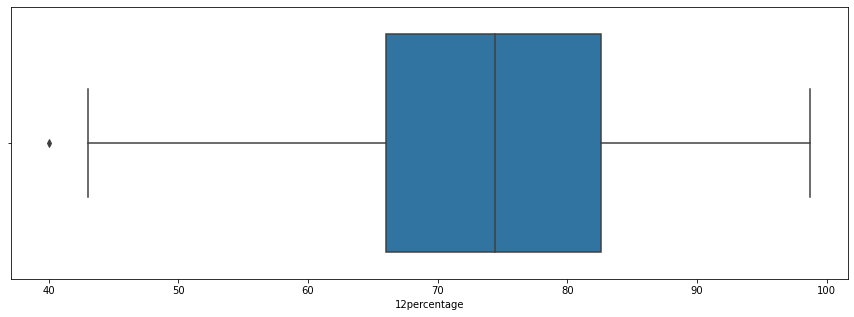

In [59]:
outl('12percentage')

#### Observation:From the above plot we can say that there are some outliers

In [60]:
outliers_iqr(df,'12percentage')

([95.8,
  85.0,
  68.2,
  83.6,
  76.8,
  87.0,
  67.5,
  91.0,
  91.2,
  72.2,
  83.7,
  86.0,
  69.83,
  62.4,
  79.9,
  64.43,
  74.8,
  66.66,
  64.8,
  62.2,
  84.63,
  74.4,
  95.2,
  43.42,
  90.0,
  82.8,
  82.5,
  83.0,
  68.0,
  74.0,
  92.0,
  86.1,
  84.4,
  68.4,
  68.0,
  61.0,
  93.8,
  85.4,
  67.0,
  89.66,
  68.6,
  60.0,
  73.0,
  87.7,
  82.5,
  87.16,
  82.0,
  71.4,
  75.0,
  61.46,
  49.5,
  72.5,
  81.5,
  78.0,
  64.8,
  90.1,
  70.1,
  95.4,
  61.1,
  49.0,
  79.0,
  88.3,
  77.8,
  62.4,
  83.0,
  79.0,
  94.4,
  79.0,
  86.67,
  73.2,
  92.0,
  64.0,
  75.0,
  64.0,
  77.0,
  78.67,
  90.0,
  72.0,
  78.2,
  95.0,
  82.4,
  60.2,
  62.6,
  70.0,
  71.33,
  70.08,
  78.0,
  56.0,
  60.0,
  80.0,
  84.33,
  75.0,
  87.9,
  65.0,
  68.5,
  94.2,
  66.0,
  88.0,
  76.6,
  50.8,
  72.0,
  66.5,
  76.4,
  61.0,
  61.0,
  92.0,
  65.8,
  61.0,
  48.0,
  73.2,
  63.0,
  71.55,
  86.33,
  74.0,
  71.3,
  72.0,
  72.0,
  57.6,
  83.4,
  75.16,
  76.6,
  60.0,
  77.77,

### Outliers in collegeGPA

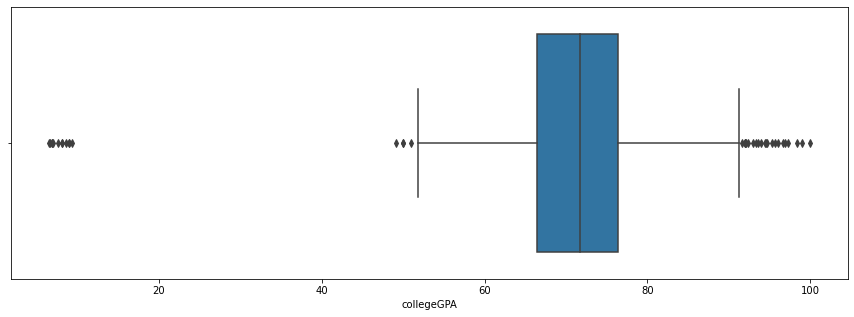

In [61]:
outl('collegeGPA')

#### Observation:From the above plot we can say that there are some outlier

In [62]:
outliers_iqr(df,'collegeGPA')

([78.0,
  70.06,
  70.0,
  74.64,
  73.9,
  76.32,
  72.98,
  8.58,
  85.03,
  78.0,
  74.9,
  72.29,
  60.0,
  60.0,
  67.67,
  63.0,
  64.8,
  74.74,
  69.54,
  76.3,
  78.15,
  74.01,
  76.0,
  55.52,
  76.0,
  78.0,
  66.15,
  76.44,
  72.0,
  68.0,
  77.2,
  71.0,
  79.3,
  74.3,
  70.86,
  64.98,
  74.1,
  63.9,
  77.15,
  76.4,
  60.22,
  66.0,
  71.0,
  71.04,
  92.1,
  79.0,
  74.01,
  77.0,
  74.0,
  57.54,
  89.7,
  57.8,
  57.64,
  80.0,
  80.0,
  67.7,
  68.2,
  80.8,
  66.9,
  55.0,
  70.0,
  85.0,
  65.35,
  69.3,
  72.13,
  70.0,
  76.12,
  71.5,
  77.55,
  70.0,
  76.4,
  61.17,
  60.0,
  67.0,
  75.0,
  75.84,
  87.6,
  63.2,
  73.5,
  78.6,
  74.14,
  69.38,
  76.25,
  55.0,
  61.0,
  63.13,
  71.1,
  62.0,
  70.82,
  79.9,
  60.0,
  77.38,
  66.0,
  66.0,
  61.5,
  88.2,
  64.0,
  70.12,
  77.85,
  80.03,
  80.0,
  66.7,
  65.0,
  70.0,
  63.0,
  72.0,
  69.7,
  62.2,
  59.0,
  66.96,
  69.3,
  78.5,
  73.46,
  70.0,
  67.0,
  78.0,
  64.06,
  61.9,
  72.7,
  77.0,


### Outliers in Domain

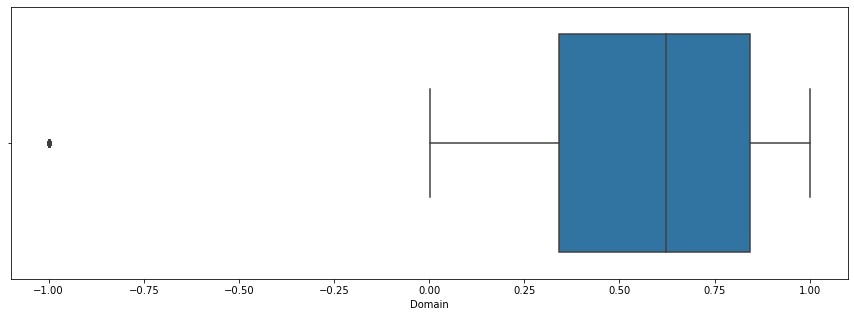

In [63]:
outl('Domain')

In [64]:
outliers_iqr(df,'Domain')

([], 0)

### Outliers in Computer Programming

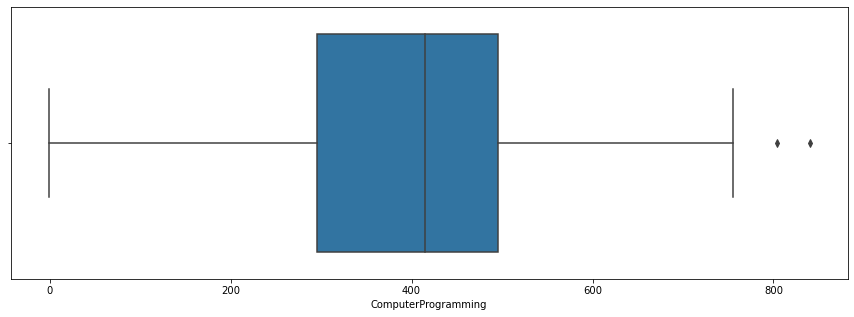

In [65]:
outl('ComputerProgramming')

In [66]:
outliers_iqr(df,'ComputerProgramming')

([445,
  395,
  615,
  645,
  405,
  735,
  385,
  485,
  605,
  385,
  495,
  355,
  515,
  545,
  425,
  525,
  445,
  445,
  455,
  475,
  565,
  535,
  335,
  345,
  455,
  485,
  385,
  445,
  465,
  415,
  435,
  475,
  395,
  525,
  155,
  375,
  445,
  475,
  515,
  555,
  405,
  435,
  495,
  485,
  415,
  305,
  315,
  315,
  804,
  615,
  455,
  445,
  455,
  385,
  405,
  425,
  415,
  285,
  575,
  285,
  355,
  375,
  505,
  195,
  435,
  225,
  405,
  515,
  425,
  445,
  335,
  475,
  335,
  455,
  455,
  435,
  405,
  455,
  415,
  595,
  195,
  345,
  275,
  495,
  415,
  485,
  455,
  415,
  465,
  445,
  445,
  555,
  505,
  305,
  475,
  525,
  505,
  345,
  334,
  445,
  455,
  435,
  345,
  545,
  475,
  275,
  335,
  415,
  275,
  475,
  285,
  275,
  415,
  275,
  305,
  475,
  615,
  385,
  495,
  395,
  405,
  225,
  495,
  405,
  525,
  425,
  365,
  415,
  445,
  555,
  485,
  485,
  355,
  545,
  455,
  375,
  515,
  505,
  475,
  615,
  455,
  365,
  315,

### Outliers in Computer Science

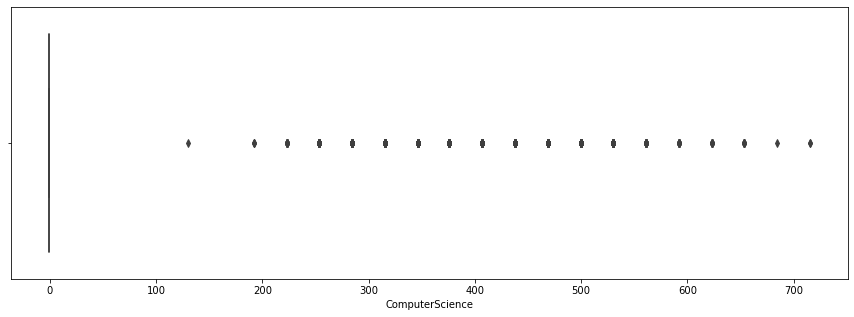

In [67]:
outl('ComputerScience')

In [68]:
outliers_iqr(df,'ComputerScience')

([407,
  346,
  376,
  500,
  346,
  438,
  376,
  407,
  500,
  346,
  346,
  315,
  253,
  346,
  376,
  346,
  500,
  469,
  192,
  530,
  438,
  469,
  500,
  346,
  438,
  315,
  500,
  346,
  407,
  315,
  284,
  284,
  438,
  253,
  469,
  284,
  346,
  438,
  376,
  530,
  223,
  376,
  376,
  500,
  407,
  376,
  469,
  376,
  438,
  561,
  315,
  407,
  407,
  376,
  376,
  438,
  407,
  315,
  407,
  315,
  407,
  530,
  407,
  407,
  438,
  469,
  376,
  407,
  376,
  438,
  561,
  561,
  407,
  684,
  438,
  315,
  407,
  500,
  376,
  346,
  438,
  407,
  315,
  346,
  407,
  284,
  438,
  223,
  376,
  530,
  407,
  530,
  284,
  346,
  346,
  530,
  376,
  438,
  407,
  253,
  346,
  469,
  346,
  376,
  438,
  438,
  376,
  346,
  346,
  376,
  530,
  469,
  376,
  407,
  346,
  407,
  376,
  407,
  530,
  469,
  376,
  315,
  407,
  469,
  592,
  315,
  469,
  315,
  315,
  530,
  315,
  500,
  438,
  592,
  438,
  346,
  315,
  407,
  438,
  438,
  561,
  469,
  376,

### Outliers in English

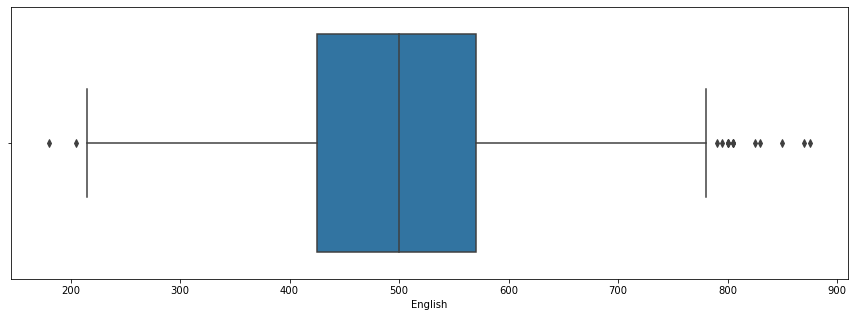

In [69]:
outl('English')

In [70]:
outliers_iqr(df,'English')

([515,
  695,
  615,
  635,
  545,
  560,
  590,
  545,
  615,
  605,
  565,
  495,
  380,
  495,
  395,
  485,
  685,
  465,
  465,
  485,
  455,
  385,
  395,
  370,
  625,
  575,
  415,
  535,
  580,
  485,
  475,
  560,
  570,
  560,
  430,
  570,
  380,
  475,
  450,
  510,
  425,
  380,
  555,
  300,
  425,
  430,
  370,
  485,
  505,
  565,
  505,
  580,
  545,
  570,
  440,
  525,
  415,
  555,
  420,
  640,
  430,
  370,
  535,
  370,
  444,
  630,
  505,
  510,
  535,
  570,
  625,
  665,
  675,
  510,
  325,
  580,
  515,
  510,
  535,
  405,
  665,
  555,
  395,
  430,
  375,
  455,
  415,
  605,
  640,
  545,
  495,
  405,
  315,
  405,
  605,
  515,
  515,
  710,
  635,
  440,
  475,
  345,
  605,
  250,
  465,
  350,
  615,
  440,
  275,
  535,
  360,
  515,
  485,
  665,
  455,
  510,
  485,
  265,
  535,
  505,
  595,
  395,
  475,
  575,
  555,
  605,
  495,
  585,
  515,
  440,
  520,
  535,
  500,
  555,
  570,
  370,
  505,
  535,
  380,
  735,
  765,
  325,
  525,

### Outliers in Quant

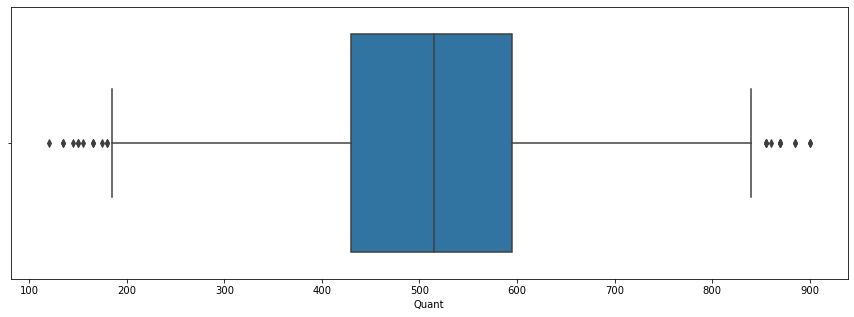

In [71]:
outl('Quant')

In [72]:
outliers_iqr(df,'Quant')

([525,
  780,
  370,
  625,
  465,
  620,
  380,
  590,
  530,
  545,
  565,
  715,
  470,
  645,
  645,
  355,
  620,
  515,
  515,
  435,
  445,
  445,
  485,
  270,
  630,
  575,
  405,
  605,
  385,
  435,
  695,
  450,
  295,
  605,
  405,
  430,
  530,
  415,
  545,
  635,
  475,
  460,
  825,
  355,
  515,
  500,
  455,
  575,
  565,
  415,
  485,
  455,
  485,
  545,
  554,
  595,
  495,
  635,
  665,
  250,
  310,
  325,
  390,
  470,
  695,
  510,
  595,
  575,
  535,
  535,
  605,
  415,
  500,
  485,
  295,
  510,
  635,
  340,
  440,
  450,
  705,
  415,
  475,
  385,
  534,
  500,
  355,
  355,
  400,
  430,
  575,
  370,
  355,
  545,
  325,
  445,
  554,
  605,
  495,
  370,
  415,
  395,
  515,
  385,
  605,
  570,
  750,
  330,
  395,
  630,
  320,
  454,
  385,
  570,
  625,
  605,
  545,
  365,
  525,
  615,
  495,
  395,
  430,
  405,
  355,
  515,
  505,
  605,
  425,
  310,
  575,
  530,
  235,
  435,
  620,
  470,
  554,
  465,
  210,
  585,
  665,
  405,
  405,

### Outliers in logical

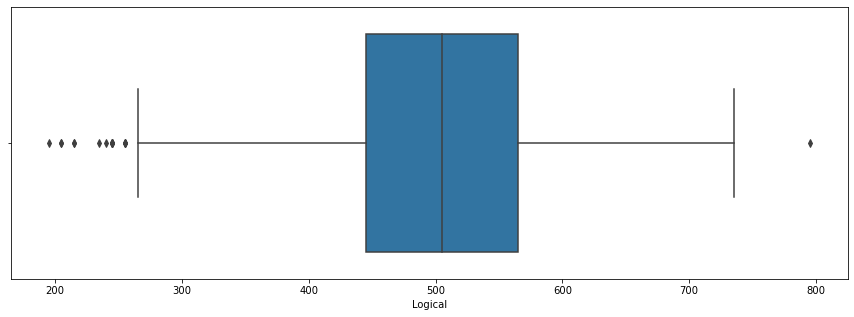

In [73]:
outl('Logical')

In [74]:
outliers_iqr(df,'Logical')

([585,
  610,
  545,
  585,
  625,
  555,
  435,
  555,
  670,
  565,
  455,
  605,
  580,
  425,
  565,
  520,
  530,
  585,
  495,
  445,
  535,
  555,
  455,
  360,
  555,
  585,
  335,
  510,
  570,
  375,
  405,
  485,
  475,
  530,
  510,
  475,
  535,
  605,
  525,
  640,
  595,
  545,
  560,
  340,
  525,
  395,
  495,
  415,
  545,
  465,
  505,
  485,
  385,
  510,
  415,
  530,
  595,
  475,
  510,
  460,
  410,
  375,
  510,
  410,
  555,
  580,
  525,
  500,
  465,
  410,
  645,
  545,
  480,
  480,
  510,
  485,
  475,
  355,
  435,
  545,
  595,
  475,
  455,
  450,
  535,
  595,
  440,
  470,
  605,
  580,
  565,
  470,
  435,
  470,
  520,
  475,
  565,
  605,
  495,
  425,
  470,
  255,
  510,
  305,
  595,
  590,
  630,
  375,
  365,
  640,
  350,
  505,
  545,
  460,
  605,
  535,
  525,
  375,
  485,
  495,
  645,
  425,
  435,
  595,
  580,
  325,
  385,
  505,
  555,
  400,
  450,
  525,
  460,
  205,
  590,
  410,
  555,
  445,
  355,
  510,
  605,
  530,
  435,

### Outliers in conscientiousness

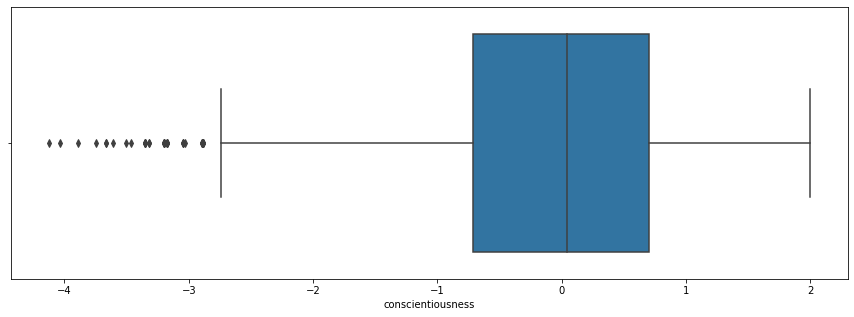

In [75]:
outl('conscientiousness')

In [76]:
outliers_iqr(df,'conscientiousness')

([-3.1994,
  -2.5039,
  -2.5811,
  -2.8879,
  -2.457,
  -2.5811,
  -3.1994,
  -2.7443,
  -3.6631,
  -3.606,
  -3.3539,
  -3.3539,
  -3.3188,
  -2.8879,
  -3.1752,
  -2.7443,
  -2.457,
  -2.5811,
  -2.457,
  -2.7443,
  -3.4624,
  -2.457,
  -3.0448,
  -3.1752,
  -2.6007,
  -2.7357,
  -2.7443,
  -2.6007,
  -2.5811,
  -2.7443,
  -2.7443,
  -3.3539,
  -3.6631,
  -2.6007,
  -2.457,
  -2.5811,
  -2.8903,
  -3.1994,
  -2.7443,
  -3.1994,
  -2.457,
  -4.1267,
  -2.457,
  -3.3539,
  -2.8903,
  -2.8879,
  -2.5811,
  -2.8879,
  -2.8879,
  -3.3539,
  -2.5811,
  -2.7357,
  -3.1752,
  -3.8933,
  -2.457,
  -3.1752,
  -3.5085,
  -2.5811,
  -2.8903,
  -3.7496,
  -2.457,
  -2.457,
  -3.0448,
  -4.0369,
  -3.1752,
  -3.0315,
  -2.7357,
  -3.3188,
  -3.1994,
  -2.7443,
  -2.7443,
  -2.5811,
  -2.8903,
  -3.0448],
 74)

### Outliers in agreeableness

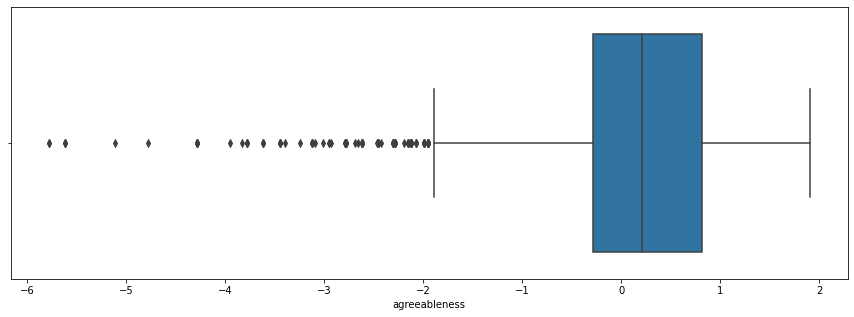

In [77]:
outl('agreeableness')

In [78]:
outliers_iqr(df,'agreeableness')

([-2.4516,
  -2.6847,
  -3.7836,
  -4.2831,
  -2.9314,
  -5.6151,
  -2.4633,
  -2.6193,
  -2.4516,
  -5.1156,
  -3.6171,
  -2.6181,
  -2.7754,
  -3.4506,
  -3.0874,
  -2.4516,
  -5.7816,
  -4.2831,
  -4.2831,
  -2.4516,
  -3.1176,
  -3.7836,
  -2.6193,
  -3.1176,
  -2.6193,
  -3.1264,
  -3.0094,
  -3.6171,
  -3.6171,
  -3.4506,
  -3.4506,
  -2.6181,
  -2.7754,
  -3.9501,
  -2.9511,
  -4.2831,
  -4.7826,
  -3.8284,
  -2.6193,
  -2.7846,
  -2.4516,
  -2.4516,
  -2.7754,
  -2.7846,
  -2.7754,
  -2.4516,
  -3.2434,
  -2.9511,
  -5.6151,
  -2.6181,
  -2.7754,
  -3.1176,
  -3.4506,
  -4.2831,
  -5.6151,
  -3.7836,
  -2.6193,
  -4.2831,
  -3.3994,
  -2.6583,
  -2.7846,
  -5.7816,
  -2.6181,
  -2.4516],
 64)

### Outliers in extraversion

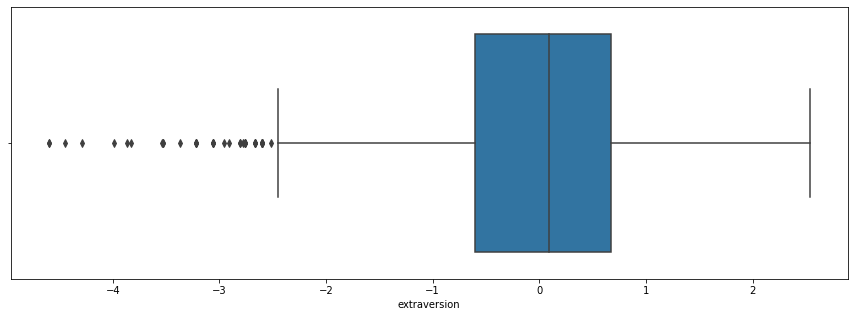

In [79]:
outl('extraversion')

In [80]:
outliers_iqr(df,'extraversion')

([-2.6028,
  -2.4491,
  -3.2176,
  -4.6009,
  2.3154,
  -3.525,
  -3.0639,
  -3.2176,
  -2.775,
  -2.6662,
  -2.4491,
  -4.6009,
  -2.6028,
  -2.9565,
  -4.2935,
  -3.0639,
  -2.7565,
  -3.537,
  -3.525,
  -2.6662,
  -2.7565,
  -2.7565,
  -3.8636,
  -3.0639,
  -2.4485,
  -2.4491,
  -2.7565,
  -2.9102,
  -2.4491,
  -3.2176,
  -3.2176,
  -3.3713,
  -2.4491,
  2.5354,
  -2.4485,
  -2.6662,
  -3.9861,
  -2.4491,
  -2.6662,
  -2.521,
  -2.4491,
  -2.8113,
  -2.8113,
  -3.0639,
  -2.6028,
  -3.8324,
  -2.6028,
  -2.6028,
  -2.6028,
  -4.4472,
  -2.6028,
  -2.4491,
  -2.4491],
 53)

### Outliers in nueroticism

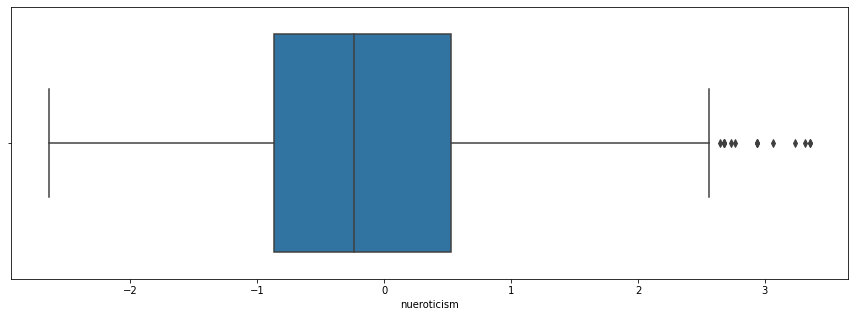

In [81]:
outl('nueroticism')

In [82]:
outliers_iqr(df,'nueroticism')

([2.6475,
  2.2949,
  2.301,
  -2.643,
  2.4278,
  2.9349,
  -2.5163,
  2.53,
  -2.5163,
  -2.5047,
  -2.5163,
  2.2949,
  3.3525,
  3.3525,
  2.301,
  -2.643,
  2.301,
  -2.5163,
  3.235,
  2.4125,
  2.6814,
  -2.5163,
  3.0617,
  -2.5163,
  2.2949,
  2.765,
  -2.643,
  2.4278,
  2.7356,
  2.9349,
  -2.643,
  2.301,
  2.4712,
  2.4278,
  2.29493,
  2.47123,
  2.6814,
  -2.643,
  2.4712,
  -2.5163,
  -2.643,
  -2.5163,
  3.3152,
  2.2949,
  2.2949,
  2.4278,
  -2.643,
  2.6814,
  2.5546,
  2.6814,
  2.5546,
  -2.5163,
  -2.5163,
  2.5593,
  -2.643,
  2.9349],
 56)

### Outliers in openess_to_experience

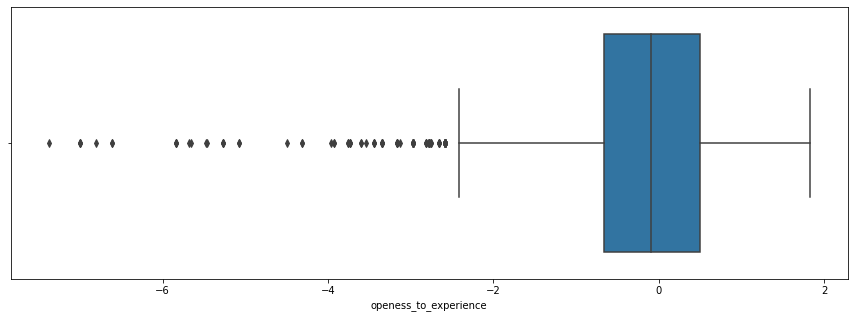

In [83]:
outl('openess_to_experience')

In [84]:
outliers_iqr(df,'openess_to_experience')

([-2.7769,
  -5.0763,
  -3.1602,
  -5.477,
  -2.9731,
  -5.2679,
  -3.9605,
  -4.5015,
  -6.9925,
  -3.4471,
  -5.2679,
  -2.5853,
  -3.3518,
  -3.735,
  -2.9686,
  -2.5853,
  -2.5853,
  -4.3099,
  -2.5853,
  -2.7595,
  -2.5853,
  -3.4471,
  -3.735,
  -2.7769,
  -6.9925,
  -2.5853,
  -3.3518,
  -5.8428,
  -2.9686,
  -2.5853,
  -2.5853,
  -2.7595,
  -3.5434,
  -3.3518,
  -6.8009,
  -2.5853,
  -2.5853,
  -2.9686,
  -3.9266,
  -3.1602,
  -2.9686,
  -2.6572,
  -2.5853,
  -2.5853,
  -3.6051,
  -3.763,
  -2.7769,
  -5.686,
  -2.6572,
  -4.3099,
  -2.5853,
  -2.9686,
  -2.8152,
  -2.6572,
  -3.4471,
  -5.6512,
  -2.8152,
  -3.1602,
  -2.7769,
  -2.7769,
  -5.4595,
  -2.6572,
  -3.3518,
  -5.8428,
  -3.1311,
  -3.763,
  -2.7769,
  -3.735,
  -2.5853,
  -2.5853,
  -2.5853,
  -5.8428,
  -3.3518,
  -6.6092,
  -3.1602,
  -3.9266,
  -2.8152,
  -2.5853,
  -2.9686,
  -5.2679,
  -5.0763,
  -2.5853,
  -7.3757,
  -2.9731,
  -2.7769,
  -6.6092,
  -2.7769,
  -6.9925,
  -2.7769,
  -3.6051,
  -2.5853,
  -2.7

## BiVariate Analysis

### Relation Between Numerical Columns using Scatter plot

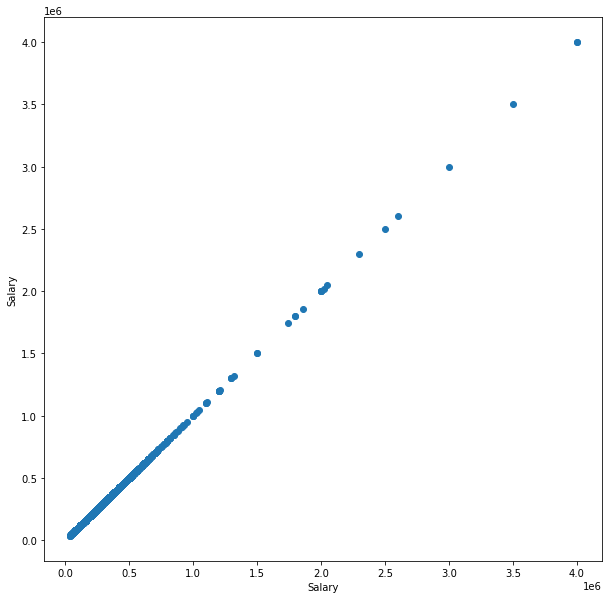

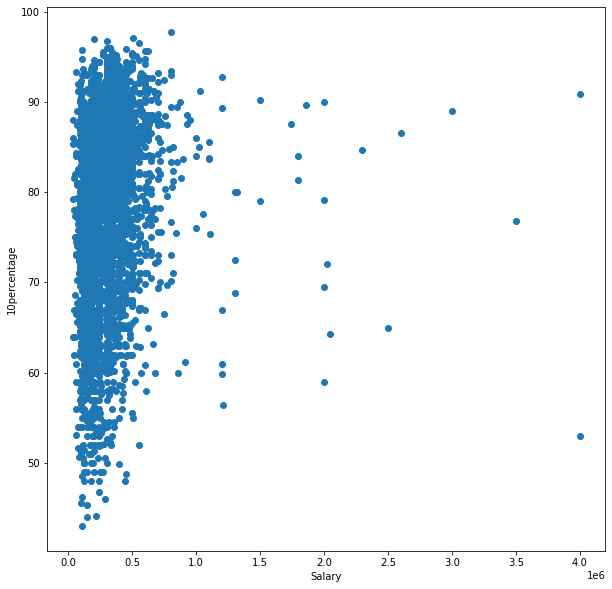

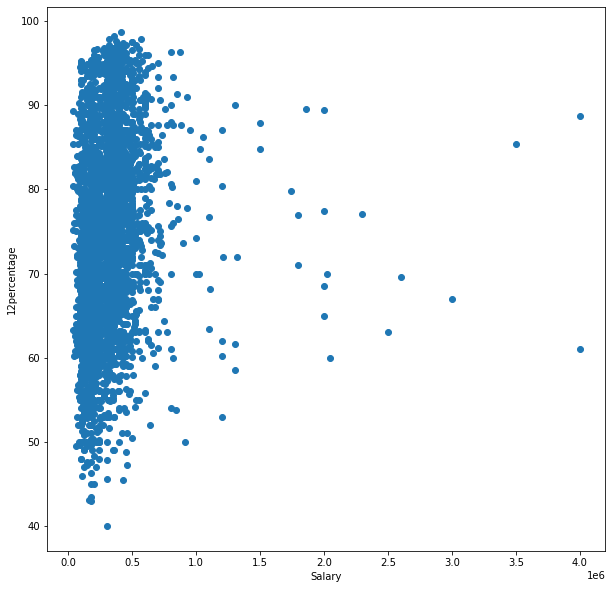

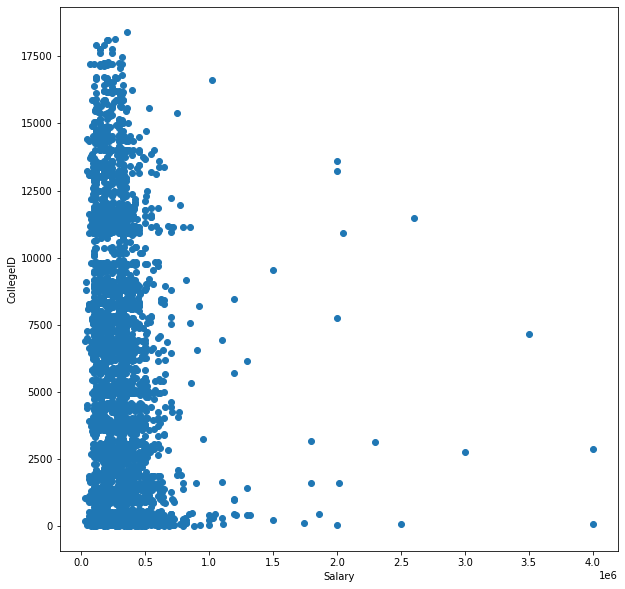

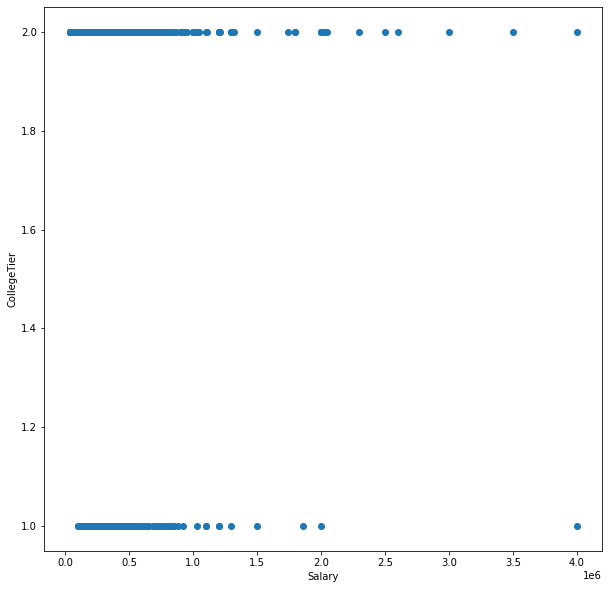

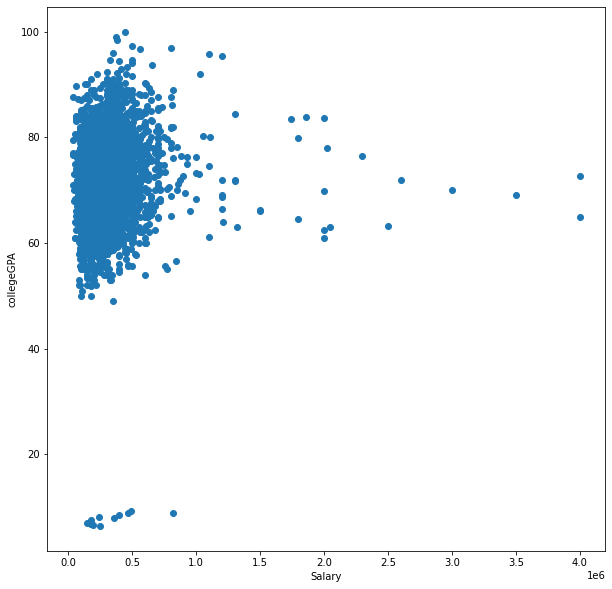

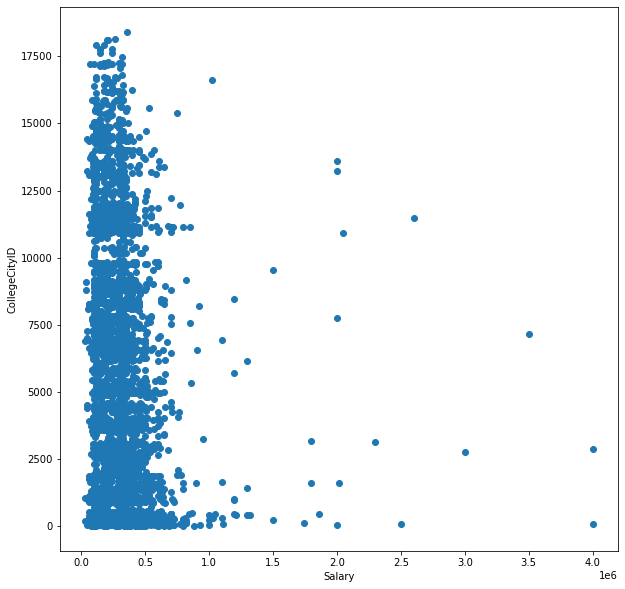

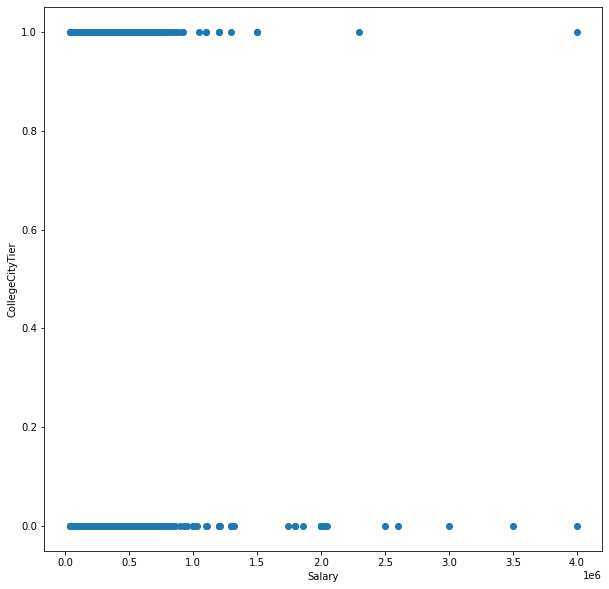

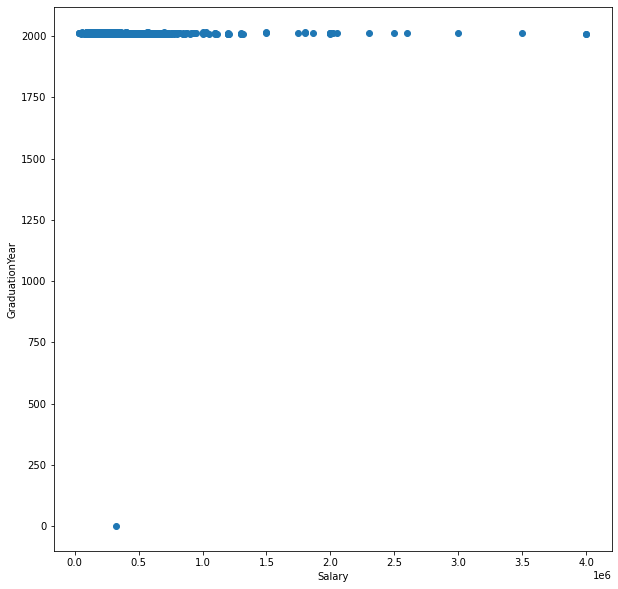

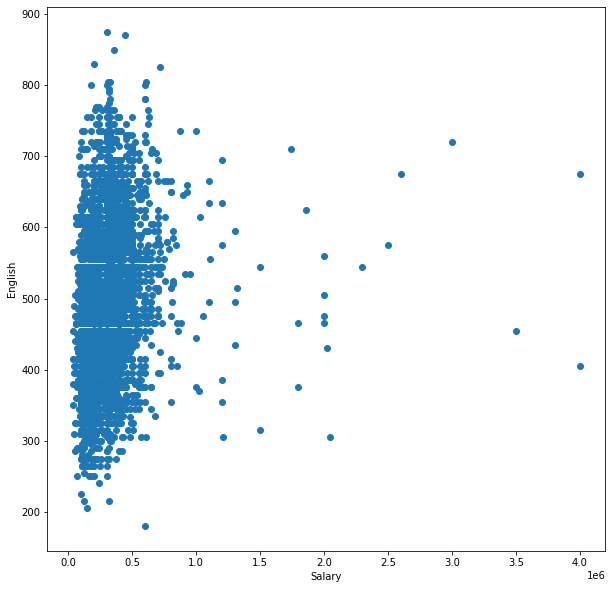

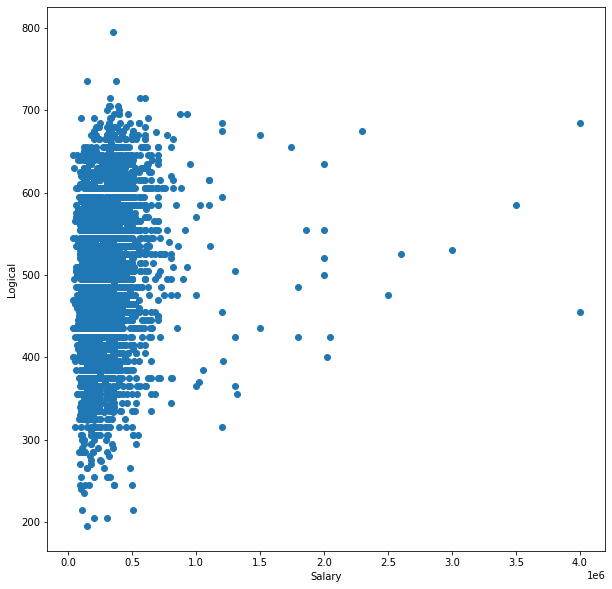

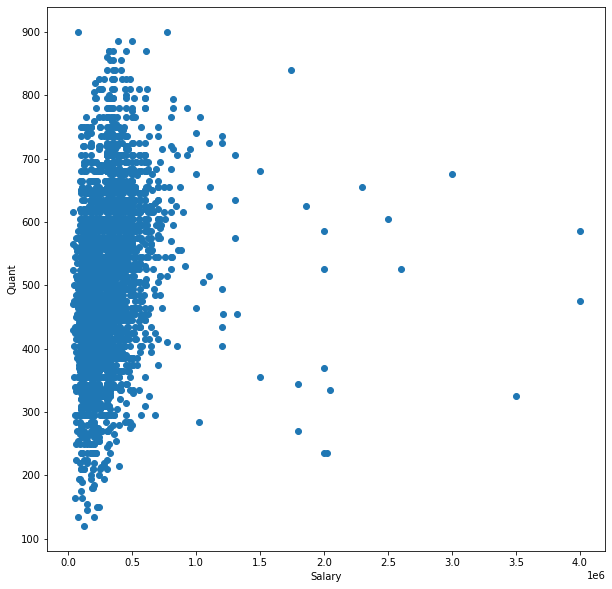

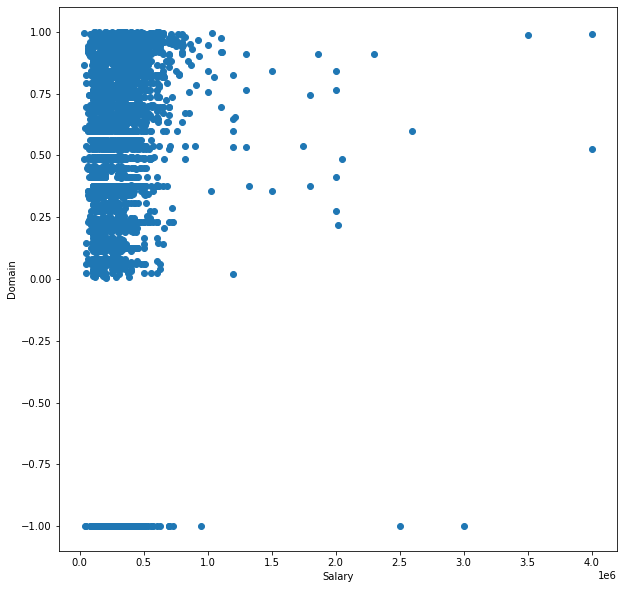

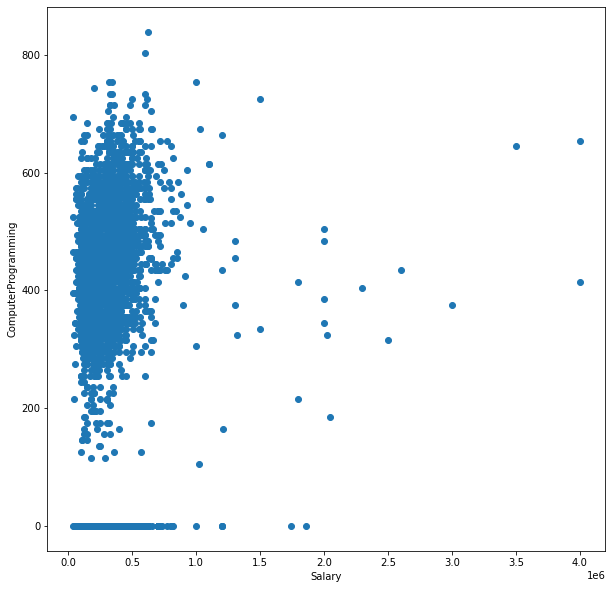

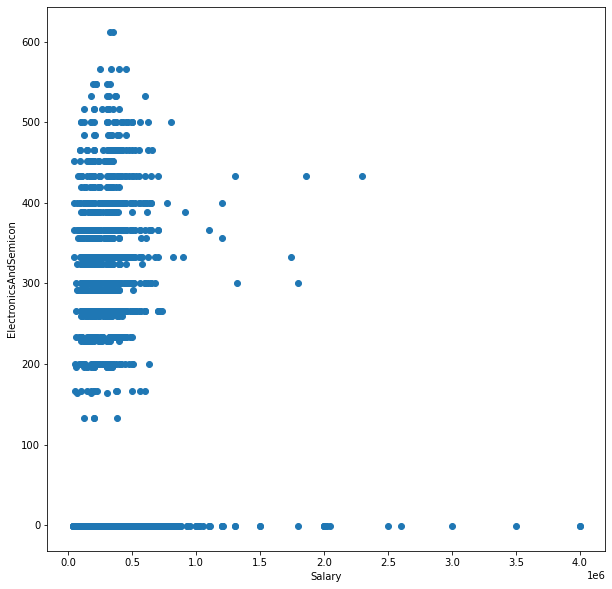

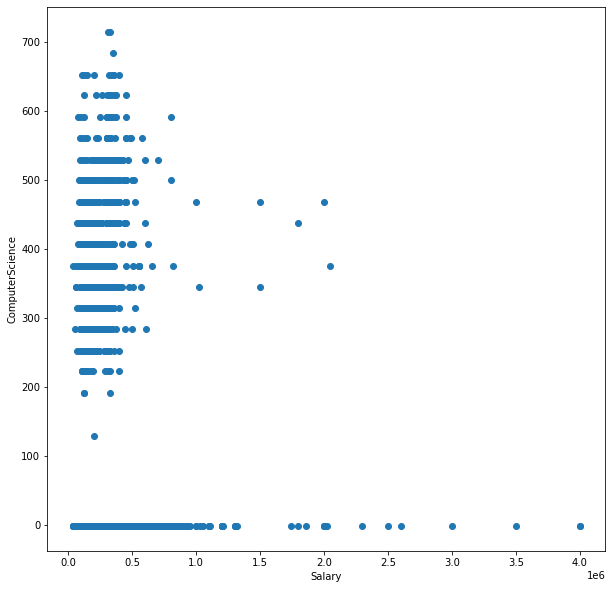

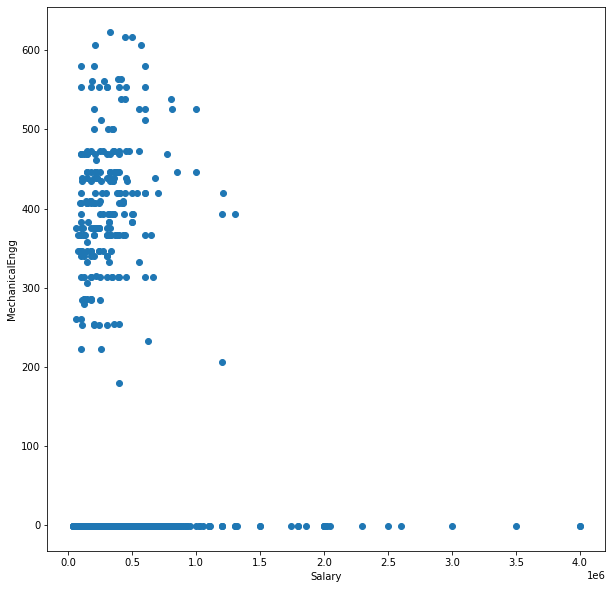

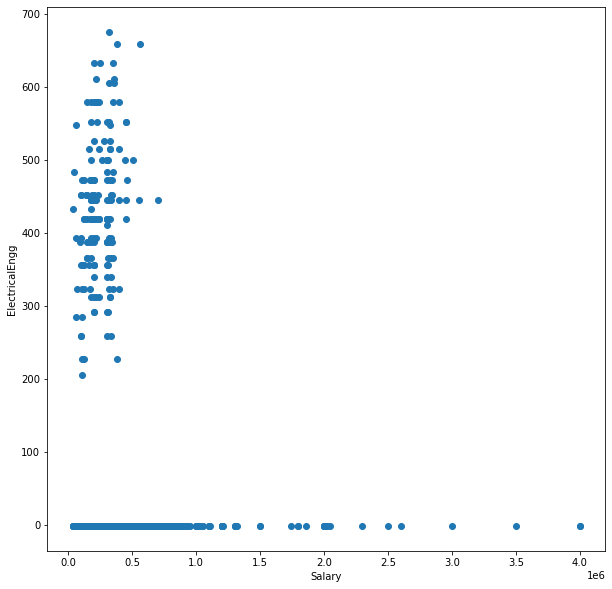

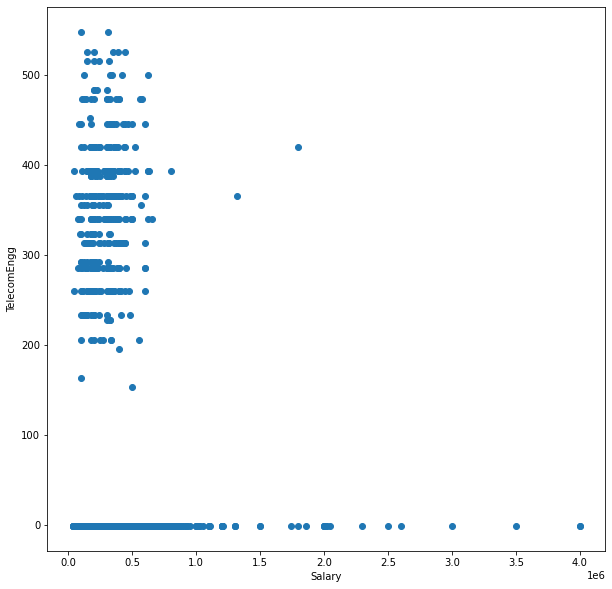

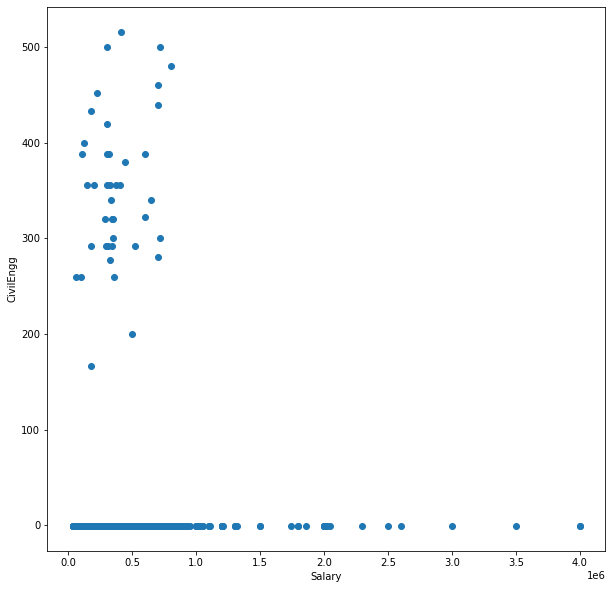

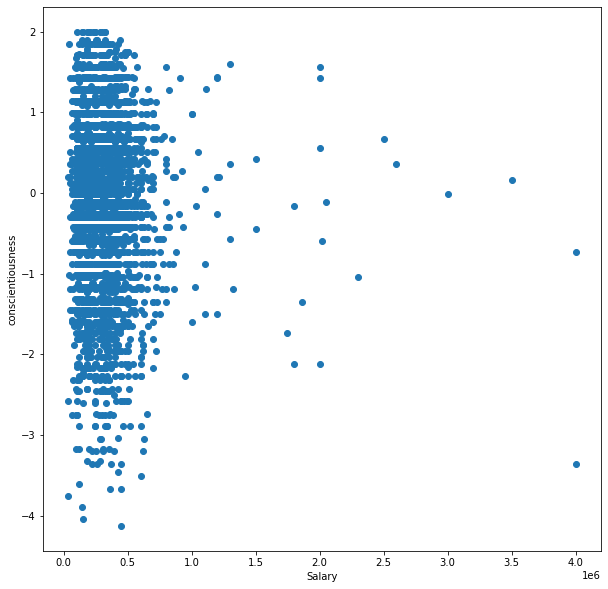

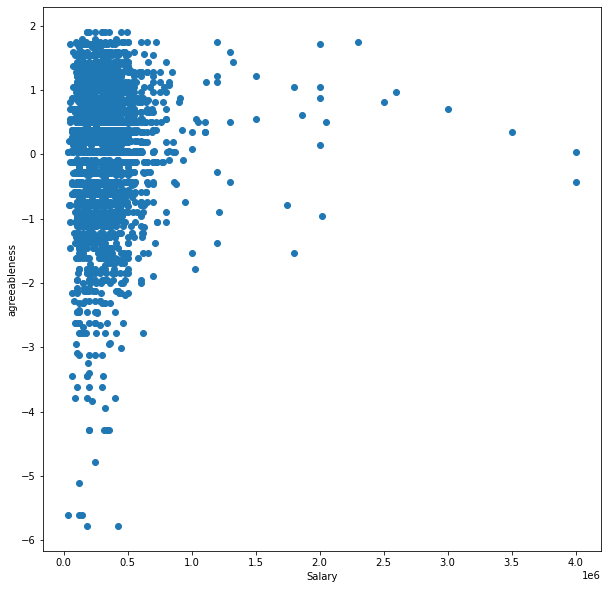

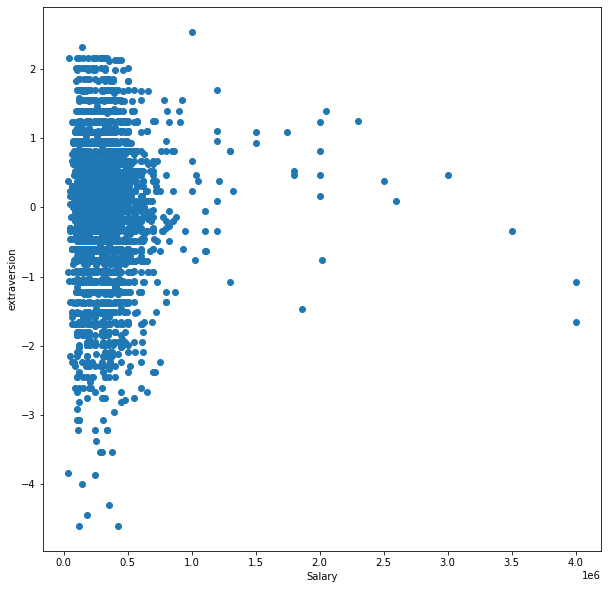

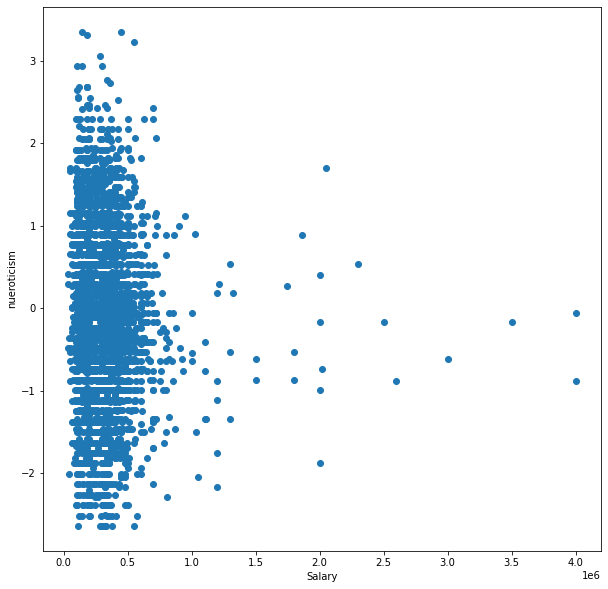

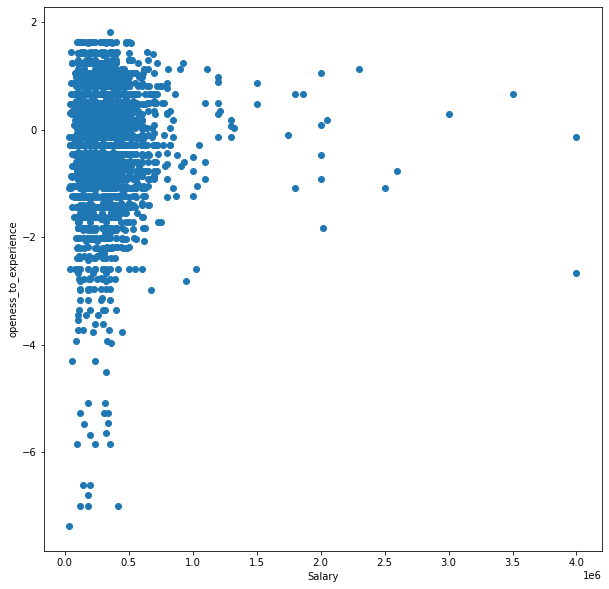

In [85]:
for i in num_var:
    plt.figure(figsize=(10,10))
    plt.xlabel('Salary')
    plt.ylabel(i)
    x=df['Salary']
    y=df[i]
    plt.scatter(x,y)

### Relation Between Numerical Columns using pair plot

<Figure size 1440x1080 with 0 Axes>

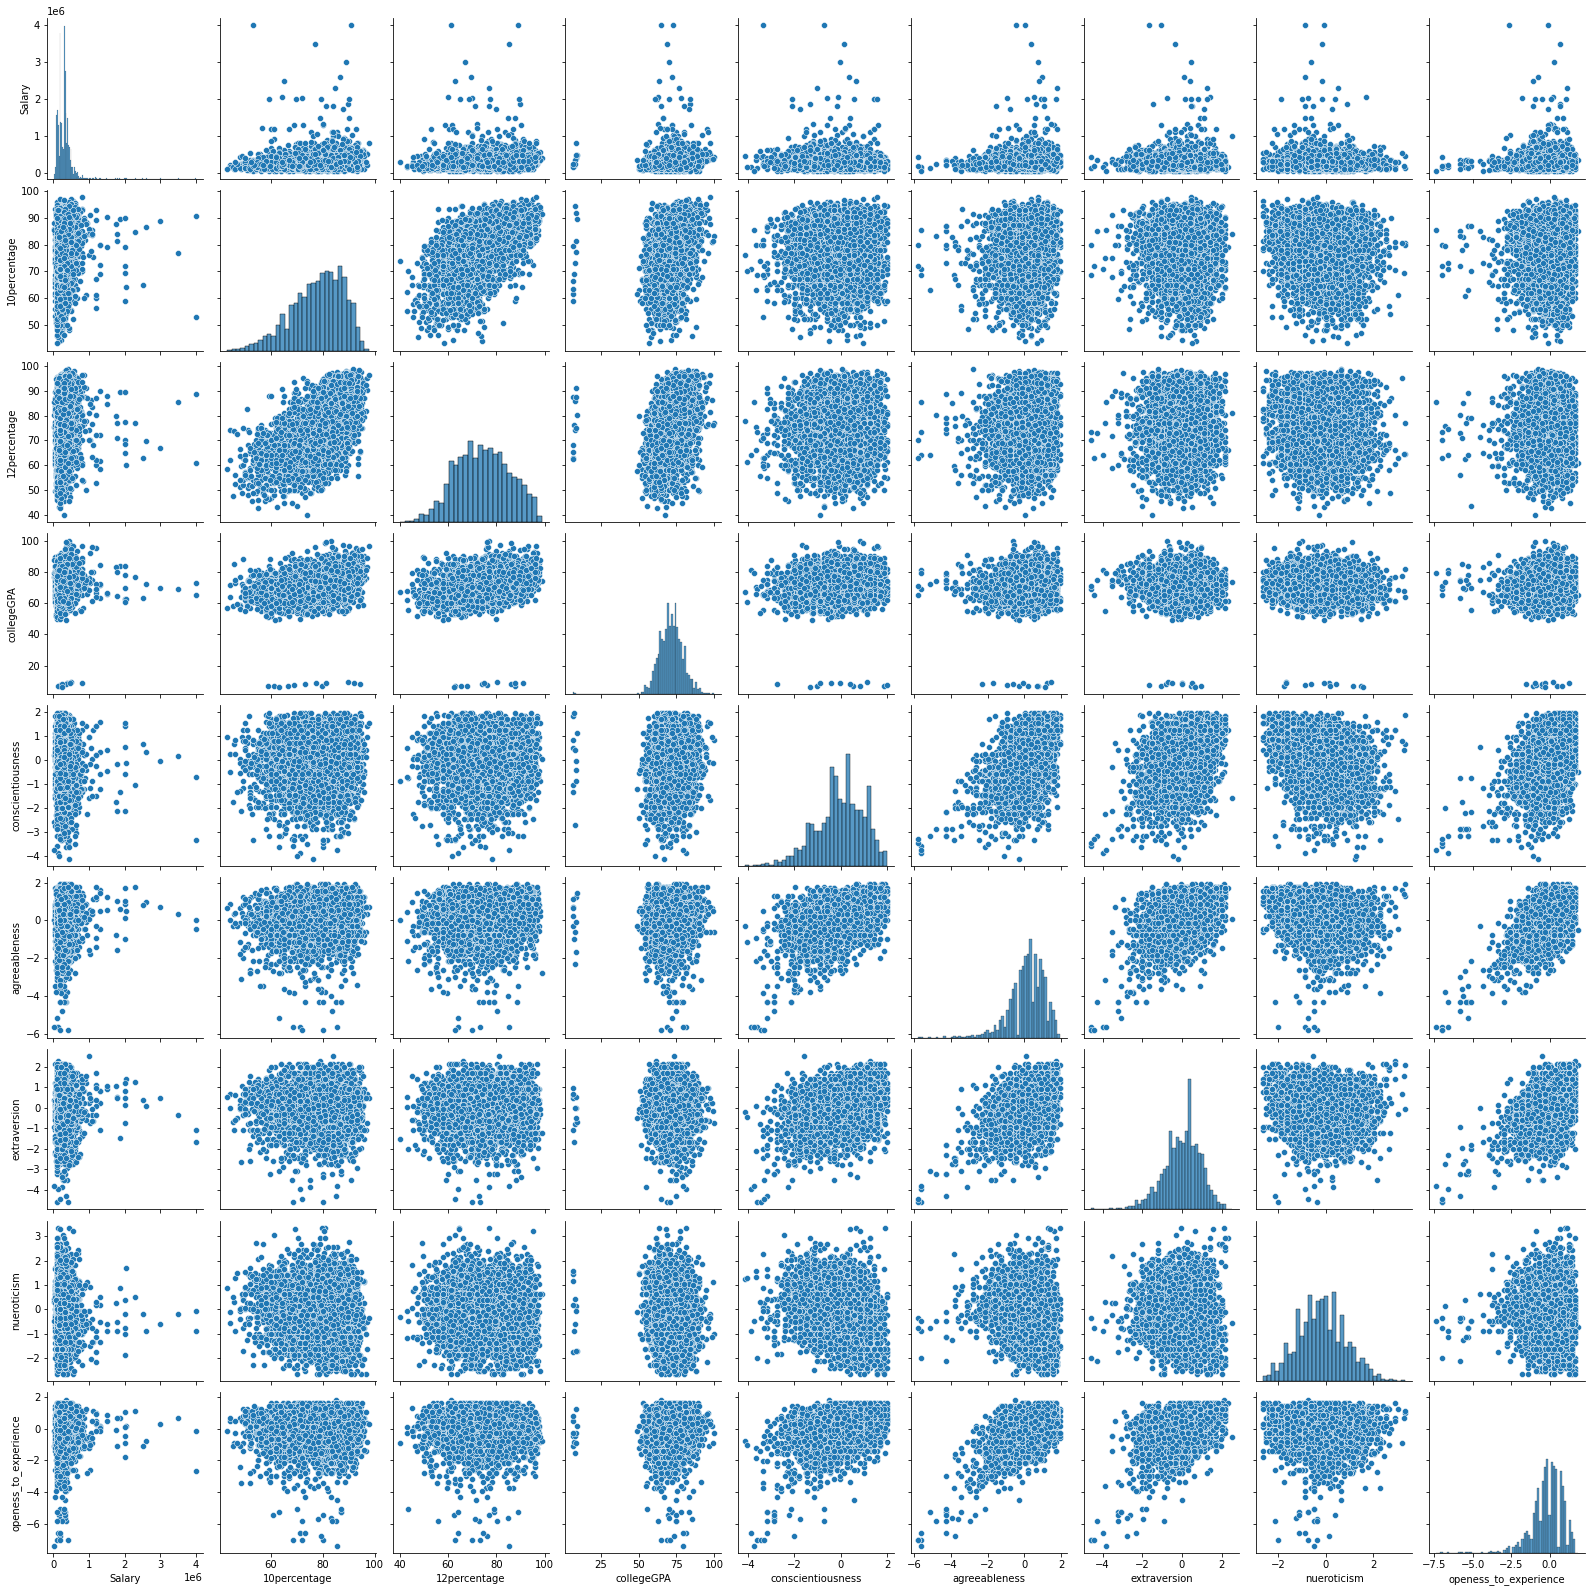

In [86]:
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

### Relation Between Continous variables

In [87]:
df['10percentage'].corr(df['12percentage'])

0.643377796023405

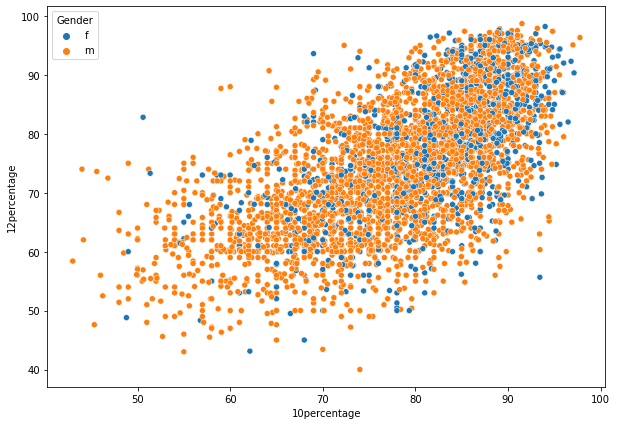

In [88]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="10percentage",y="12percentage",data=df,hue="Gender")
plt.show()

### Relation between categorical and numerical columns

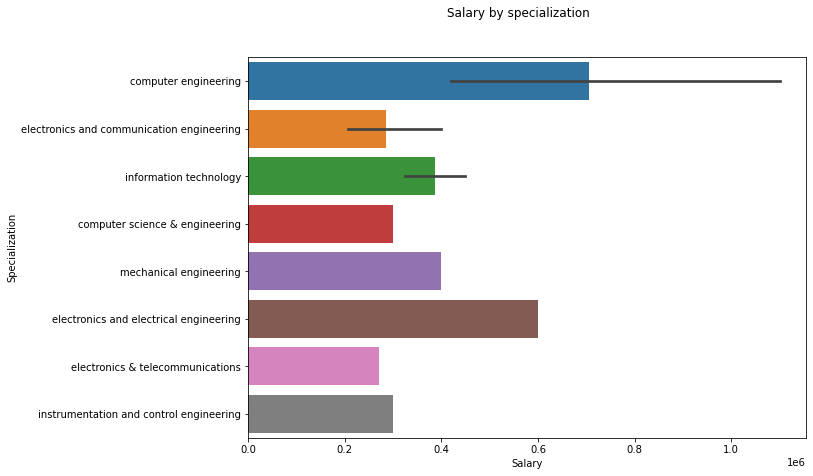

In [89]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

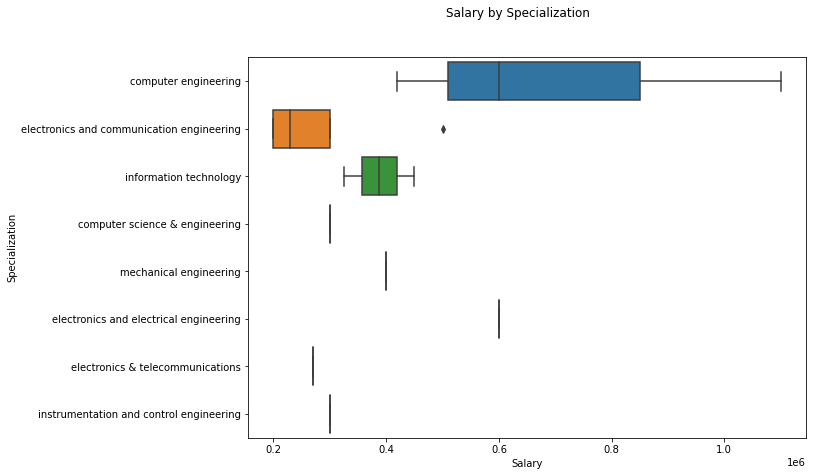

In [90]:
plt.figure(figsize=(10,7))
sns.boxplot(x=df['Salary'].iloc[:20], y=df['Specialization'].iloc[:15])
plt.suptitle('Salary by Specialization')
plt.show()

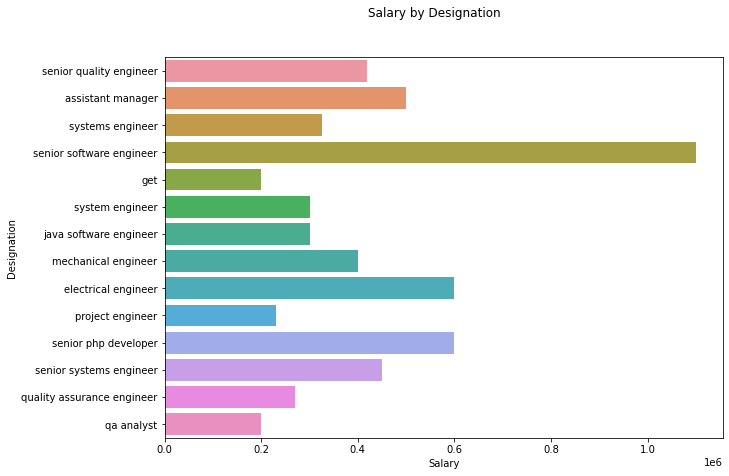

In [91]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Salary'].iloc[:20], y=df['Designation'].iloc[:15])
plt.suptitle('Salary by Designation')
plt.show()

### Salary of these  Designation Fields via Gender

In [92]:
top_20_fields=list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]

In [93]:
dsg=df[df["Designation"].isin(top_20_fields)]
dsg.groupby(["Designation"])["Salary"].describe().sort_values("max",ascending=False)

count          mean           std        min  \
Designation                                                               
automation engineer         15.0  6.406667e+05  9.481069e+05   110000.0   
senior software engineer    72.0  5.440278e+05  4.521737e+05   215000.0   
assistant system engineer   23.0  4.823913e+05  6.583500e+05   290000.0   
programmer                  36.0  3.259722e+05  4.783511e+05    60000.0   
application developer       52.0  4.190385e+05  3.878713e+05    40000.0   
software test engineer     100.0  3.374500e+05  3.051780e+05    60000.0   
software developer         265.0  2.583774e+05  1.784195e+05    50000.0   
software engineer trainee    3.0  7.816667e+05  1.099231e+06   105000.0   
operations analyst          12.0  4.437500e+05  5.075302e+05   145000.0   
it technician                6.0  5.183333e+05  7.270878e+05   180000.0   
data scientist               3.0  8.966667e+05  9.612665e+05   240000.0   
technical lead               5.0  6.690000e+05  7.642104e+05   120000.0   
field engineer               3.0  8.016667e+05  9.165742e+05   265000.0   
salesforce developer         7.0  4.607143e+05  5.981808e+05    95000.0   
client services associate   13.0  3.523077e+05  4.491966e+05   120000.0   
java software engineer     111.0  3.013063e+05  1.751372e+05   105000.0   
software engineer          539.0  3.412152e+05  1.445396e+05    60000.0   
sales account manager        2.0  7.100000e+05  8.626703e+05   100000.0   
junior manager               1.0  1.300000e+06           NaN  1300000.0   
senior engineer             18.0  5.250000e+05  2.462244e+05   250000.0   

                                 25%        50%        75%        max  
Designation                                                            
automation engineer         307500.0   400000.0   512500.0  4000000.0  
senior software engineer    348750.0   455000.0   608750.0  4000000.0  
assistant system engineer   325000.0   350000.0   372500.0  3500000.0  
programmer                  148750.0   210000.0   312500.0  3000000.0  
application developer       300000.0   350000.0   411250.0  2600000.0  
software test engineer      218750.0   300000.0   360000.0  2500000.0  
software developer          145000.0   240000.0   340000.0  2300000.0  
software engineer trainee   147500.0   190000.0  1120000.0  2050000.0  
operations analyst          247500.0   290000.0   415000.0  2020000.0  
it technician               200000.0   215000.0   282500.0  2000000.0  
data scientist              345000.0   450000.0  1225000.0  2000000.0  
technical lead              215000.0   465000.0   545000.0  2000000.0  
field engineer              272500.0   280000.0  1070000.0  1860000.0  
salesforce developer        180000.0   280000.0   345000.0  1800000.0  
client services associate   180000.0   205000.0   275000.0  1800000.0  
java software engineer      202500.0   300000.0   350000.0  1745000.0  
software engineer           255000.0   320000.0   400000.0  1500000.0  
sales account manager       405000.0   710000.0  1015000.0  1320000.0  
junior manager             1300000.0  1300000.0  1300000.0  1300000.0  
senior engineer             370000.0   485000.0   583750.0  1300000.0

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

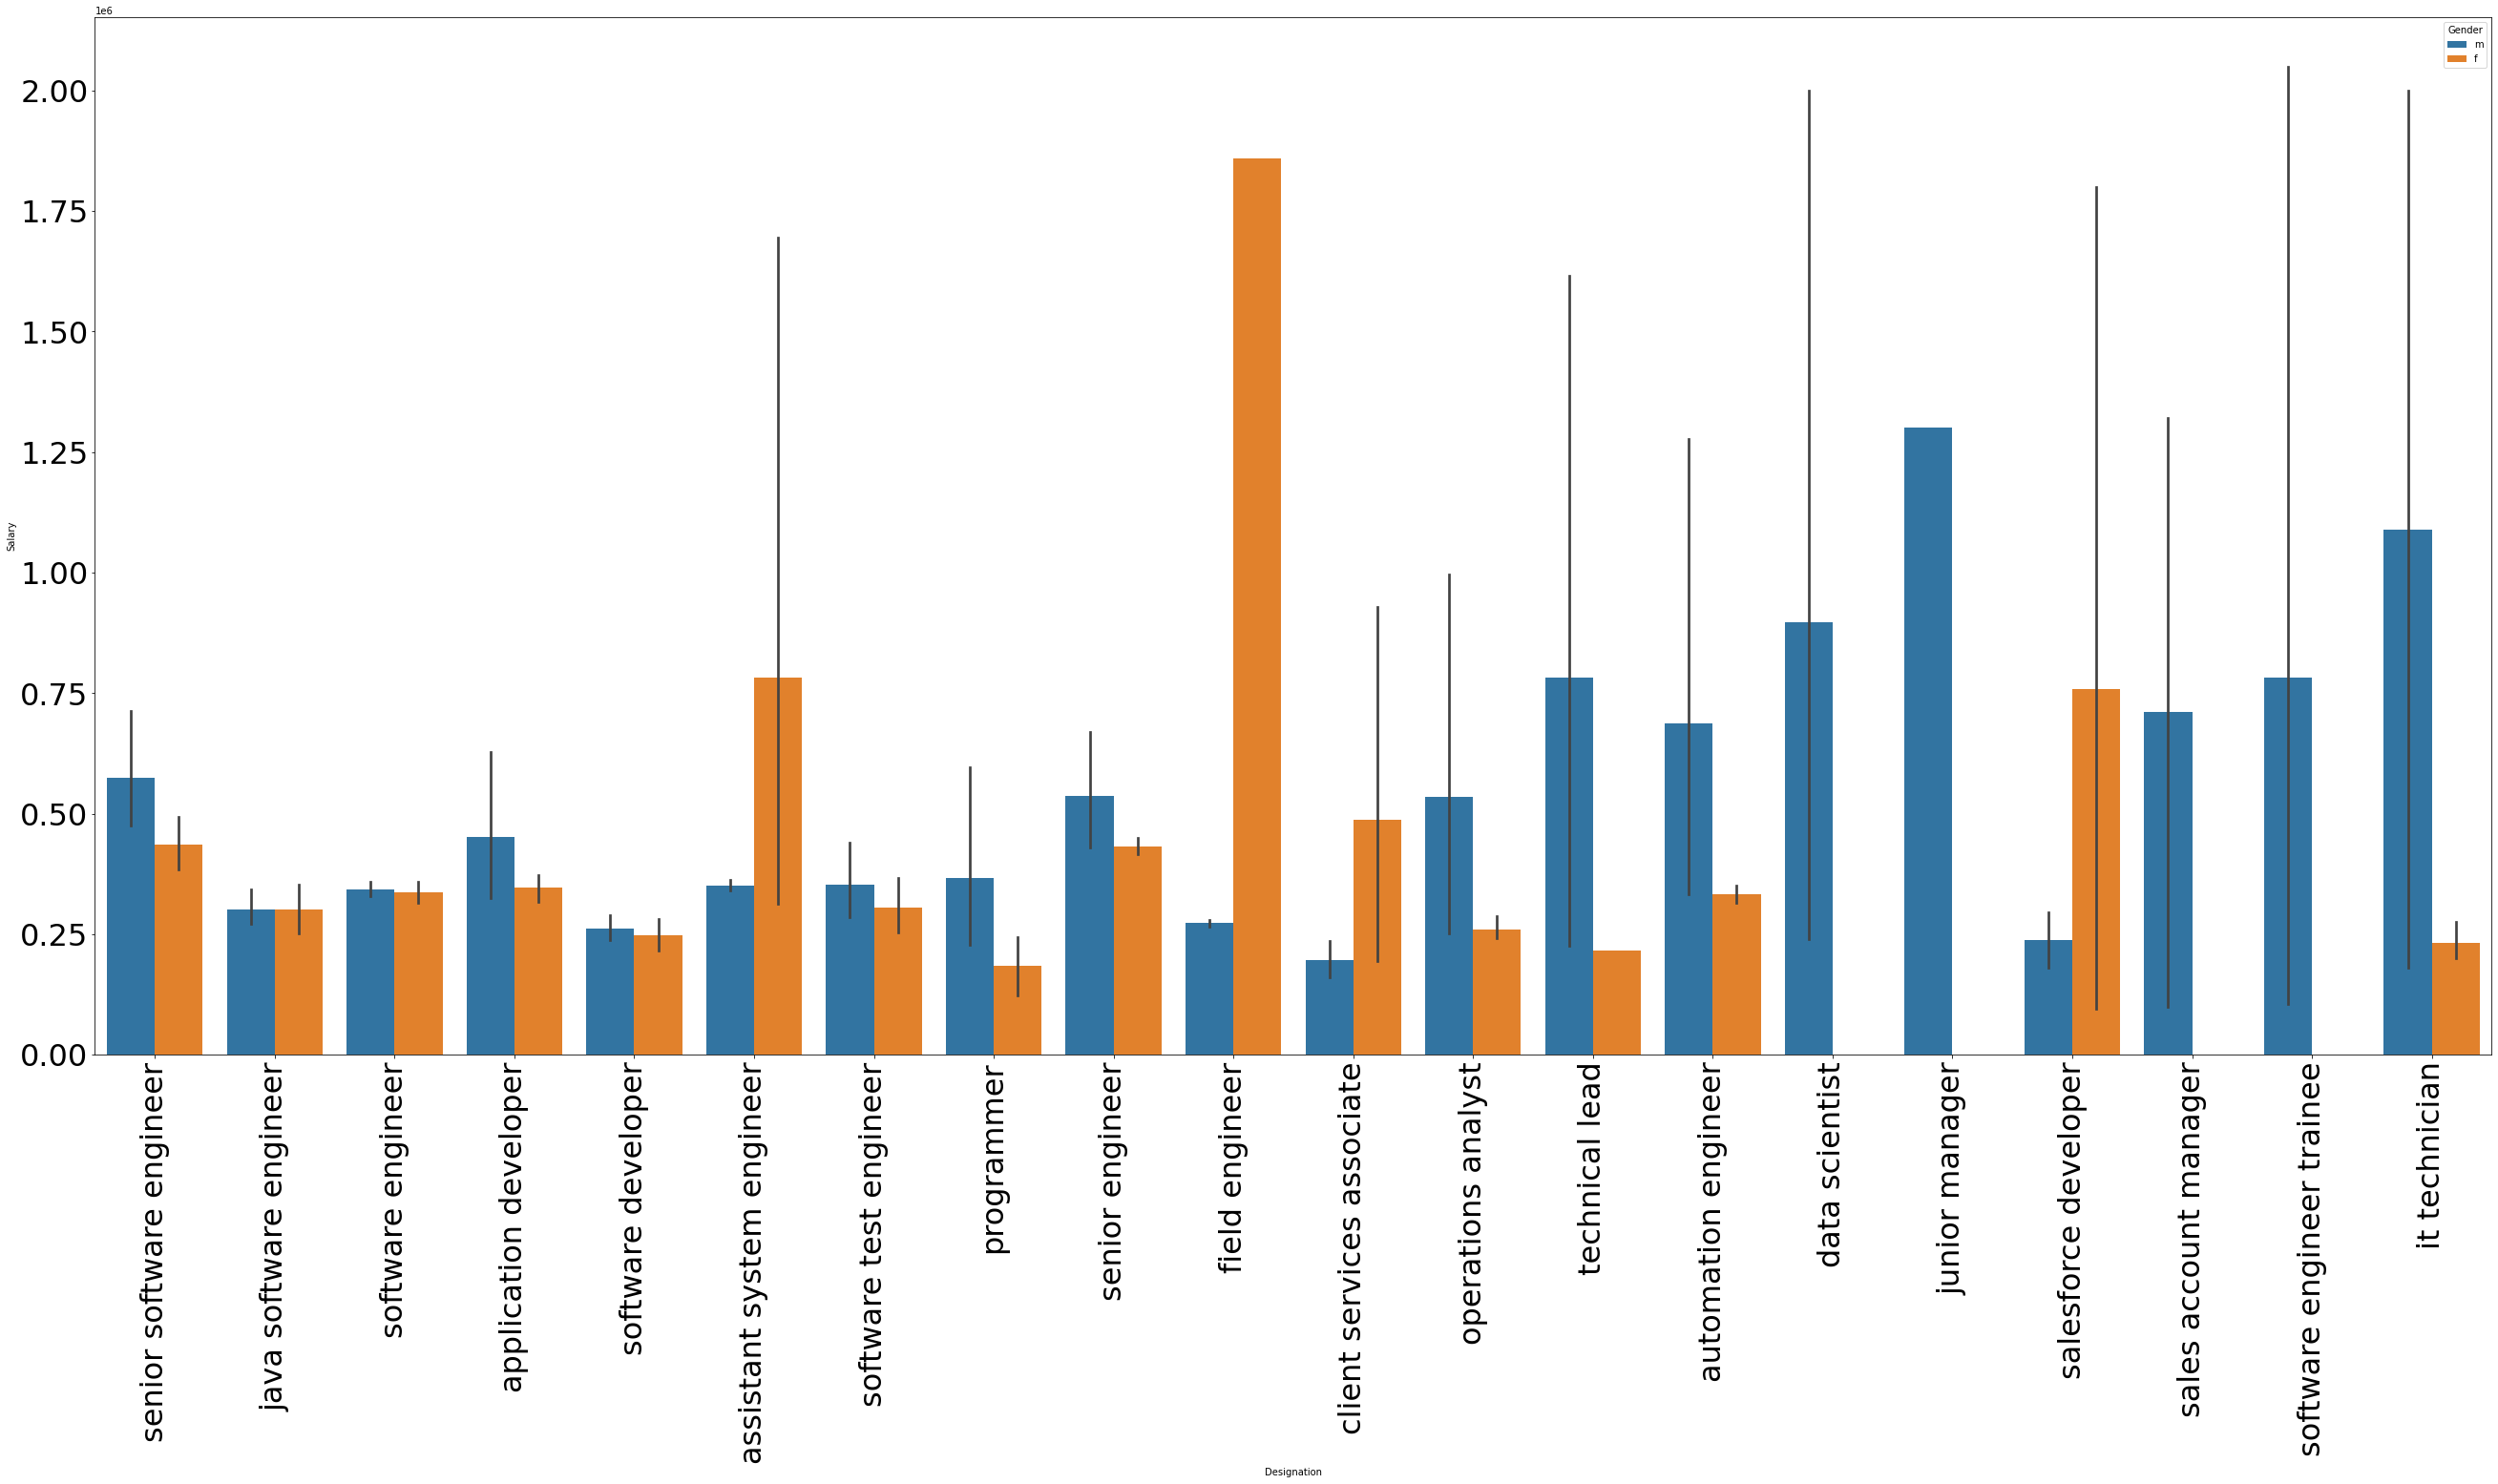

In [94]:
plt.figure(figsize=(45,20))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=dsg)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

#### From the Above plot we see that some fields have equal no of gender who have nearly equal salaries while some fields have males who have high salaries while some have female having high salaries. A male with proffesion as Junior manager has max salary while female with field engineer has max salary of all the fields and genders.

#### Year wise Employment groupby Gender

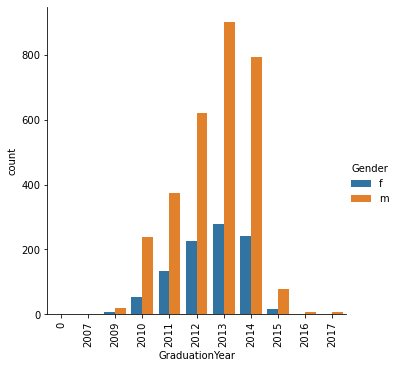

In [95]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

### Swarm Plot

<AxesSubplot:xlabel='12percentage', ylabel='collegeGPA'>

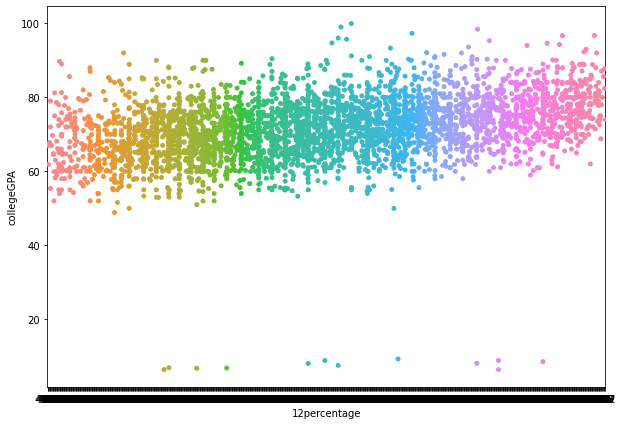

In [96]:
plt.figure(figsize=(10,7))
sns.swarmplot(data = df, x='12percentage', y='collegeGPA')

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

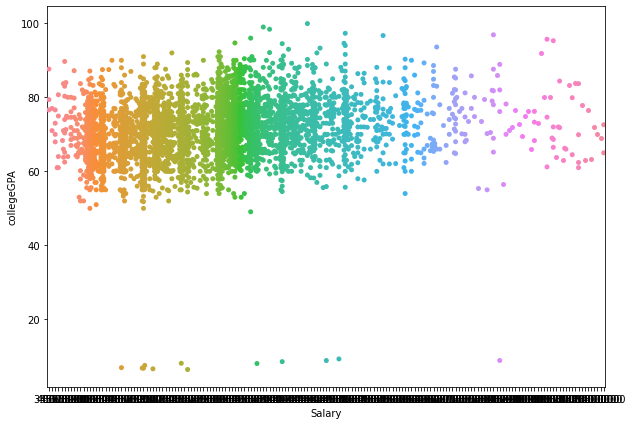

In [97]:
plt.figure(figsize=(10,7))
sns.swarmplot(data = df, x='Salary', y='collegeGPA')

### Correlation between the features using corr() function

In [98]:
df.corr()

Salary  10percentage  12percentage  CollegeID  \
Salary                 1.000000      0.177373      0.170254  -0.118690   
10percentage           0.177373      1.000000      0.643378   0.021082   
12percentage           0.170254      0.643378      1.000000   0.022336   
CollegeID             -0.118690      0.021082      0.022336   1.000000   
CollegeTier           -0.179332     -0.126042     -0.100771   0.067054   
collegeGPA             0.130103      0.312538      0.346137   0.017240   
CollegeCityID         -0.118690      0.021082      0.022336   1.000000   
CollegeCityTier        0.015384      0.116707      0.130462   0.007757   
GraduationYear        -0.010053     -0.013799     -0.012933  -0.000172   
English                0.178219      0.350780      0.212888  -0.022792   
Logical                0.179275      0.316014      0.243571  -0.047094   
Quant                  0.230627      0.317640      0.312413  -0.114672   
Domain                 0.104656      0.078563      0.074099  -0.073857   
ComputerProgramming    0.115665      0.053600      0.080818  -0.033760   
ElectronicsAndSemicon  0.000665      0.085179      0.117112  -0.020438   
ComputerScience       -0.100720     -0.018933     -0.043534   0.102303   
MechanicalEngg         0.018475      0.050364      0.037635  -0.009291   
ElectricalEngg        -0.047598      0.074419      0.064001   0.022933   
TelecomEngg           -0.022691      0.049378      0.044201   0.025620   
CivilEngg              0.037639      0.030002      0.005910   0.005749   
conscientiousness     -0.064148      0.067657      0.058299   0.076432   
agreeableness          0.057423      0.136645      0.103998  -0.005264   
extraversion          -0.010213     -0.004679     -0.007486   0.005917   
nueroticism           -0.054685     -0.132496     -0.094369  -0.008973   
openess_to_experience -0.011312      0.036692      0.006332  -0.010678   

                       CollegeTier  collegeGPA  CollegeCityID  \
Salary                   -0.179332    0.130103      -0.118690   
10percentage             -0.126042    0.312538       0.021082   
12percentage             -0.100771    0.346137       0.022336   
CollegeID                 0.067054    0.017240       1.000000   
CollegeTier               1.000000   -0.086781       0.067054   
collegeGPA               -0.086781    1.000000       0.017240   
CollegeCityID             0.067054    0.017240       1.000000   
CollegeCityTier          -0.101494    0.017471       0.007757   
GraduationYear           -0.005557    0.008706      -0.000172   
English                  -0.183843    0.106478      -0.022792   
Logical                  -0.182811    0.196610      -0.047094   
Quant                    -0.251103    0.217380      -0.114672   
Domain                   -0.061436    0.107252      -0.073857   
ComputerProgramming      -0.073644    0.136596      -0.033760   
ElectronicsAndSemicon    -0.031573    0.029855      -0.020438   
ComputerScience           0.001053    0.007601       0.102303   
MechanicalEngg           -0.021548   -0.031765      -0.009291   
ElectricalEngg            0.002594    0.052258       0.022933   
TelecomEngg               0.000007   -0.005226       0.025620   
CivilEngg                -0.033722   -0.018950       0.005749   
conscientiousness         0.055174    0.069582       0.076432   
agreeableness            -0.038055    0.068282      -0.005264   
extraversion              0.009970   -0.032684       0.005917   
nueroticism               0.023778   -0.074859      -0.008973   
openess_to_experience    -0.019179    0.028071      -0.010678   

                       CollegeCityTier  GraduationYear   English   Logical  \
Salary                        0.015384       -0.010053  0.178219  0.179275   
10percentage                  0.116707       -0.013799  0.350780  0.316014   
12percentage                  0.130462       -0.012933  0.212888  0.243571   
CollegeID                     0.007757       -0.000172 -0.022792 -0.047094   
CollegeTier        

### Correlation between the features using Heatmap


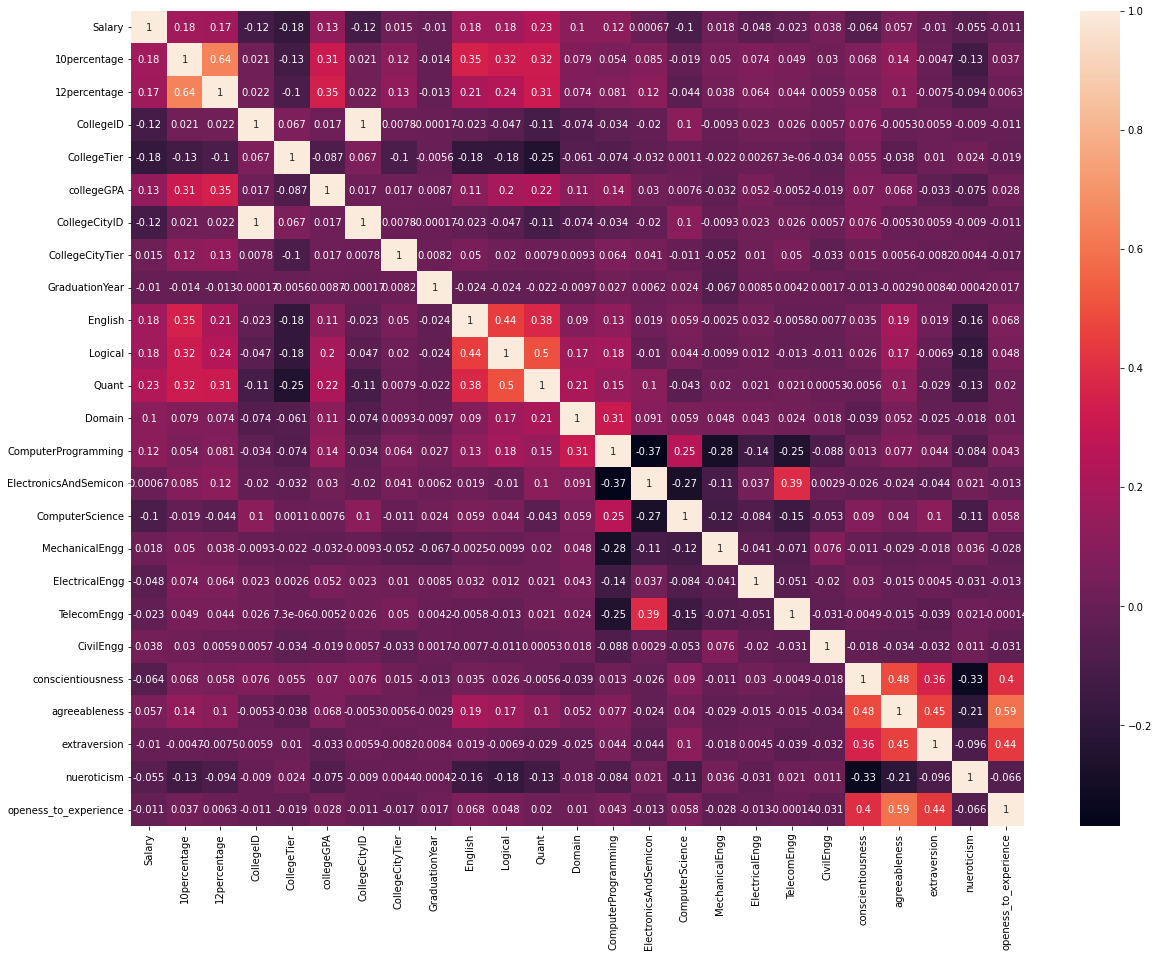

In [99]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

1.From the above plotted Meatmap we can say that 10percentage and 12percentage is highly positively correlated with each other means if a student got a better marks in 10th standard then it is highly possible that he or she can get the better marks in 12th standard also

2.As we can see that Conscientiousness, Agreeableness, Extraversion, and Openess_to_experience are also highly correlated with each other

## FINAL CONCLUSION AND ANALYSIS OBSERVATION

### SO FINALLY WE INFER THAT MOST OF THE AMCAT ASPIRANTS ARE MALES AND COMING FROM NORTHEN SIDE FROM U.P AND ARE FROM IT DOMAIN WITH MOST OF THEM AS SW ENGINEERS AS PROFFESION WORKING IN BANGLORE WITH DEGREE : SPECIALIZATION AS BE:CSE HAVING EXP OF 4 YRS AND SALARY AROUND 300 K.

### SO AFTER SW ENGINEER,WE LOOKED AT SECOND HIGHEST PROFFESION IS SW DEVELOPER AND FOR SW DEVELOPER THE AVERAGE SALARY IS 250K AND EXP OF 3 YRS AND LIKE SW ENGG THEY ALSO COME FROM U.P WHO WORK IN BANGLORE AND SPECIALIZATION:DEGREE AS BE:CSE

#### 

### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.

#### Hypothesis Testing

In [100]:
# Normalize Salary for Better Visualization
df['n_sal']=df['Salary']/100000

In [101]:
df[['Designation','Specialization']][df['Designation']=='hardware engineer']

Designation                             Specialization
197   hardware engineer                     electrical engineering
802   hardware engineer  electronics and communication engineering
839   hardware engineer  electronics and communication engineering
1886  hardware engineer  electronics and communication engineering
2070  hardware engineer  electronics and communication engineering
2533  hardware engineer  electronics and communication engineering
3438  hardware engineer                    electronics engineering
3547  hardware engineer  electronics and communication engineering

In [102]:
print('Average Salary :')
print('Programmer Analyst :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 3.02
Software Engineer : 3.4
Hardware Engineer : nan
Associate Engineer : 3.33


#### Sample Data for Required Employees

In [103]:
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

In [104]:
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

#### Sample Standard Devation

In [105]:
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


#### Calulating T-Score

In [106]:
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

#### Necessary variables initialization ex- sample mean,population mean

In [107]:
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

#### Calling T-score Function

In [108]:
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


#### Two Tail - Deciding the Significance Level & Calculating the t-critical value

In [109]:
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


#### Visualizing the Sampling Distribution with Rejection Regions

t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

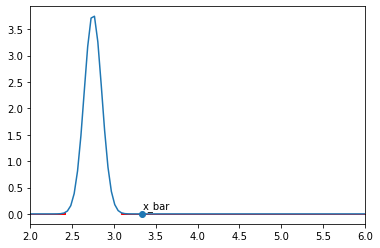

In [110]:
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

#### Conclusion using t-test

In [111]:
if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


#### Conclusion using p-test

In [112]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


In [113]:
df["Exp"]=pd.to_datetime(df["DOL"]).dt.year-pd.to_datetime(df["DOJ"]).dt.year

In [114]:
df_1=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Exp"]<1)]

#### We saw that For experinced sw engineers the salary was around 5 lakhs, Lets See for Freshers.

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

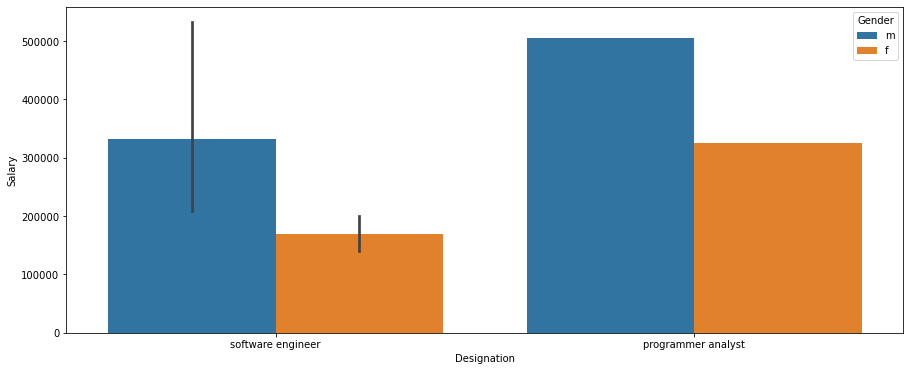

In [115]:
plt.figure(figsize=(15,6))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=df_1)

#### From aboove we can see that for freshers The Salary starts from 300K or we can say for sure the min salary is sure shot ABOOVE 200K.

In [116]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv=st.ttest_1samp(df_1["Salary"],popmean=250000)[1]
if pv<0.05:
    print("We reject the null hypthesis and say that Avearge Salary for aboove fields is not 250K")
else:
    print("The avg salary for fresh graduates is 250K")

The avg salary for fresh graduates is 250K


### Is there any relation between Gender and Specialization?

#### H0=There is no Relation between Gender and Specialization,Gender doesnt impacts Specialization
H1=There is Relation between Gender and Specialization,Gender impacts Specialization

In [117]:
gsc=pd.crosstab(df_1["Gender"],df_1["Specialization"],margins=True)
pv_1=cst(gsc)
if pv_1[1]<0.05:
    print("There is relation and gender does impact What specializations are done")
else:
    print("There is no relation and gender doesnt impacts What specializations are done")

There is no relation and gender doesnt impacts What specializations are done


In [118]:
cst(pd.crosstab(df_1['Gender'],df_1["Specialization"]))

(3.5285714285714285,
 0.7401645930839376,
 6,
 array([[0.15789474, 0.31578947, 1.10526316, 0.15789474, 0.78947368,
         0.15789474, 0.31578947],
        [0.84210526, 1.68421053, 5.89473684, 0.84210526, 4.21052632,
         0.84210526, 1.68421053]]))

<AxesSubplot:xlabel='Gender', ylabel='Specialization'>

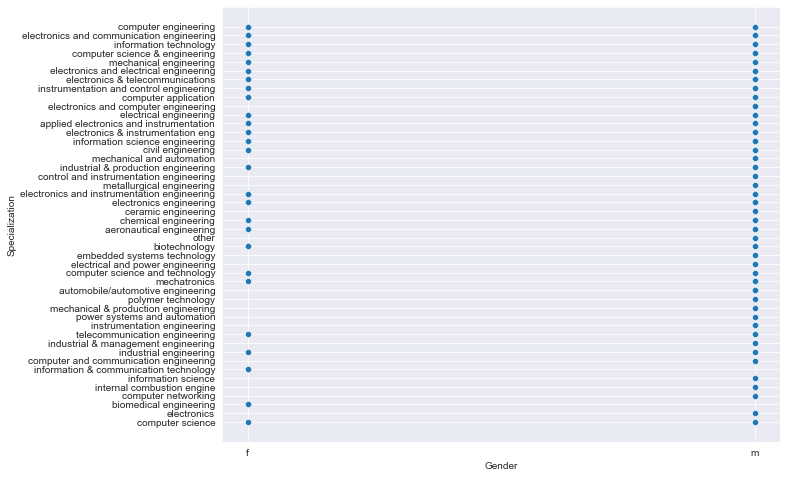

In [120]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="Gender",y="Specialization")

### SO FROM ABOVE THE FIRST CLAIM IS FOR FRESHERS THE SALARY IS BETWEEN 2 TO 3 LAKHS BUT THE SECOND CLIAM WHICH SAYS GENDER IMPACTS SPECIALIZATION,THAT IS FALSE

## Feature Transformation

### Standardization for Numerical Features

In [121]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [122]:
# Standardizing Salary Column
scaled_sal = scaler.fit_transform(df['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [123]:
# Standardizing 10th percent Column
scaled_10 = scaler.fit_transform(df['10percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.75420015]
 [0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]
 [0.83272462]
 [0.69393718]
 [0.74141709]
 [0.32505478]
 [0.69758948]
 [0.48466034]
 [0.7815924 ]
 [0.32505478]
 [0.4017531 ]
 [0.65741417]]


In [124]:
# Standardizing 12th percent Column
scaled_10 = scaler.fit_transform(df['12percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


In [125]:
# Standardizing collegeGPA Column
scaled_10 = scaler.fit_transform(df['collegeGPA'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.76540436]
 [0.68046641]
 [0.67982456]
 [0.72946085]
 [0.72154472]
 [0.74743261]
 [0.71170304]
 [0.02278562]
 [0.84060762]
 [0.76540436]
 [0.73224219]
 [0.70432178]
 [0.57284981]
 [0.57284981]
 [0.65489944]
 [0.60494223]
 [0.62419769]
 [0.73053059]
 [0.67490372]
 [0.74721866]]


### One hot Encoding for Categorical Features

In [131]:
# One-hot Encoding of Categorical column
dummies = pd.get_dummies(df[catg_var])
dummies

Designation_.net developer  Designation_.net web developer  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
3993                           0                               0   
3994                           0                               0   
3995                           0                               0   
3996                           0                               0   
3997                           0                               0   

      Designation_account executive  Designation_account manager  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
...                             ...                          ...   
3993                              0                            0   
3994                              0                            0   
3995                              0                            0   
3996                              0                            0   
3997                              0                            0   

      Designation_admin assistant  Designation_administrative coordinator  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   
...                           ...                                     ...   
3993                            0                                       0   
3994                            0                                       0   
3995                            0                                       0   
3996                            0                                       0   
3997                            0                                       0   

      Designation_administrative support  Designation_aircraft technician  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
3993                                   0                                0   
3994                                   0                                0   
3995                                   0                                0   
3996                                   0                                0   
3997                                   0                                0   

      Designation_android developer  Designation_application developer  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   
...                             ...                                ...   
3993

In [132]:
# One-hot Encoding of Gender column
dummy = pd.get_dummies(df[['Gender']])
dummy

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
3            0         1
4            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3998 rows x 2 columns]